# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Dany Eka Saputra
- Email: ekaadany12@gmail.com
- Id Dicoding: danyeka_s

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import shap

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


### Menyiapkan data yang akan digunakan

In [2]:
dataset = "employee_data.csv"
df = pd.read_csv(dataset)

## Data Understanding

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan data understanding. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan data cleaning. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara domain knowledge maupun secara statistik.

**Melihat 5 baris teratas dari dataset**

In [3]:
df.head()

EmployeeId  Age  Attrition     BusinessTravel  DailyRate  \
0           1   38        NaN  Travel_Frequently       1444   
1           2   37        1.0      Travel_Rarely       1141   
2           3   51        1.0      Travel_Rarely       1323   
3           4   42        0.0  Travel_Frequently        555   
4           5   40        NaN      Travel_Rarely       1194   

               Department  DistanceFromHome  Education EducationField  \
0         Human Resources                 1          4          Other   
1  Research & Development                11          2        Medical   
2  Research & Development                 4          4  Life Sciences   
3                   Sales                26          3      Marketing   
4  Research & Development                 2          4        Medical   

   EmployeeCount  ...  RelationshipSatisfaction StandardHours  \
0              1  ...                         2            80   
1              1  ...                         1            80   
2              1  ...                         3            80   
3              1  ...                         4            80   
4              1  ...                         2            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 1                  7                      2               3   
1                 0                 15                      2               1   
2                 3                 18                      2               4   
3                 1                 23                      2               4   
4                 3                 20                      2               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  2                        1   
1               1                  0                        0   
2              10                  0                        2   
3              20                  4                        4   
4               5                  3                        0   

   YearsWithCurrManager  
0                     2  
1                     0  
2                     7  
3                     8  
4                     2  

[5 rows x 35 columns]

In [4]:
print(f"The number of rows and columns in the HR Analytics Employee Attrition & Performance dataset is {df.shape}")

The number of rows and columns in the HR Analytics Employee Attrition & Performance dataset is (1470, 35)


**Melihat info dataset**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

**Melihat deskripsi data**

In [6]:
df.describe()

EmployeeId          Age    Attrition    DailyRate  DistanceFromHome  \
count  1470.000000  1470.000000  1058.000000  1470.000000       1470.000000   
mean    735.500000    36.923810     0.169187   802.485714          9.192517   
std     424.496761     9.135373     0.375094   403.509100          8.106864   
min       1.000000    18.000000     0.000000   102.000000          1.000000   
25%     368.250000    30.000000     0.000000   465.000000          2.000000   
50%     735.500000    36.000000     0.000000   802.000000          7.000000   
75%    1102.750000    43.000000     0.000000  1157.000000         14.000000   
max    1470.000000    60.000000     1.000000  1499.000000         29.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  1470.000000         1470.0              1470.000000  1470.000000   
mean      2.912925            1.0                 2.721769    65.891156   
std       1.024165            0.0                 1.093082    20.329428   
min       1.000000            1.0                 1.000000    30.000000   
25%       2.000000            1.0                 2.000000    48.000000   
50%       3.000000            1.0                 3.000000    66.000000   
75%       4.000000            1.0                 4.000000    83.750000   
max       5.000000            1.0                 4.000000   100.000000   

       JobInvolvement  ...  RelationshipSatisfaction  StandardHours  \
count     1470.000000  ...               1470.000000         1470.0   
mean         2.729932  ...                  2.712245           80.0   
std          0.711561  ...                  1.081209            0.0   
min          1.000000  ...                  1.000000           80.0   
25%          2.000000  ...                  2.000000           80.0   
50%          3.000000  ...                  3.000000           80.0   
75%          3.000000  ...                  4.000000           80.0   
max          4.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 27 columns]

**mengidentifikasi kolom kategorikal dan numerikal**

In [7]:
#Categorical Columns
cat = df.select_dtypes(['object']).columns
#Numerical Columns
num = df.select_dtypes(['number']).columns


print(cat)
print(num)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['EmployeeId', 'Age', 'Attrition', 'DailyRate', 'DistanceFromHome',
       'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


**mengecek jumlah kolom numerik dan kategorikal**

In [8]:
column_data_types = df.dtypes

numerical_count = 0
categorical_count = 0
for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

print(f"{numerical_count} Columns are Numerical")
print(f"{categorical_count} Columns are Categorical")

27 Columns are Numerical
8 Columns are Categorical


**mengambil sampel acak dari kolom-kolom numerik**

In [9]:
# Numerical Coloumns
df.select_dtypes(np.number).sample(5)

EmployeeId  Age  Attrition  DailyRate  DistanceFromHome  Education  \
274          275   44        0.0       1199                 4          2   
791          792   21        NaN        501                 5          1   
1450        1451   51        0.0        968                 6          2   
402          403   29        1.0        121                27          3   
371          372   47        NaN       1162                 1          1   

      EmployeeCount  EnvironmentSatisfaction  HourlyRate  JobInvolvement  ...  \
274               1                        3          92               4  ...   
791               1                        3          58               3  ...   
1450              1                        2          40               2  ...   
402               1                        2          35               3  ...   
371               1                        3          98               3  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
274                          4             80                 2   
791                          4             80                 0   
1450                         2             80                 0   
402                          4             80                 3   
371                          1             80                 2   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
274                  26                      4                2   
791                   2                      6                3   
1450                  8                      6                2   
402                  10                      3                2   
371                  14                      3                1   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
274               25                   9                       14   
791                2                   2                        1   
1450               7                   0                        7   
402               10                   4                        1   
371               13                   8                        5   

      YearsWithCurrManager  
274                     13  
791                      2  
1450                     7  
402                      9  
371                     12  

[5 rows x 27 columns]

**mengambil sampel acak dari kolom-kolom categorical**

In [10]:
# Categorical Coloumns
df.select_dtypes(include='O').sample(5)

BusinessTravel              Department EducationField  Gender  \
120  Travel_Rarely                   Sales      Marketing  Female   
203  Travel_Rarely                   Sales      Marketing    Male   
954  Travel_Rarely  Research & Development        Medical    Male   
58   Travel_Rarely  Research & Development  Life Sciences    Male   
118     Non-Travel                   Sales        Medical    Male   

                    JobRole MaritalStatus Over18 OverTime  
120                 Manager       Married      Y       No  
203         Sales Executive      Divorced      Y       No  
954  Manufacturing Director      Divorced      Y       No  
58       Research Scientist      Divorced      Y       No  
118         Sales Executive      Divorced      Y       No

**Mengecek missing values pada setiap kolom**

In [11]:
missing_values = df.isnull().sum()
missing_values

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

**Mengecek duplikasi pada dataset**

In [12]:
duplicate_count = df.duplicated().sum()
print("Jumlah duplikasi: ", duplicate_count)

Jumlah duplikasi:  0


**Ringkasan Dataset**
  - Total baris: 1,470
  - Total kolom: 35
  - Fitur target Attrition memiliki 412 missing values.
  - Tipe data terdiri dari numerik (int64, float64) dan kategorikal (object).
  - 0 duplikat data ditemukan.

 **Outliers**

Kode ini berfungsi untuk memvisualisasikan distribusi data dari semua kolom numerik dalam sebuah DataFrame df menggunakan dua jenis plot untuk setiap kolom:

Penjelasan Singkat:
1. Pilih kolom numerik dari DataFrame (select_dtypes dengan include=['number']).

2. Hitung jumlah kolom numerik agar dapat mengatur jumlah baris grafik.

3. Buat figure dan grid layout menggunakan matplotlib agar tampilan grafik rapi dan dinamis mengikuti jumlah kolom.

4. Looping tiap kolom numerik, lalu:
   - Buat KDE plot (kurva distribusi) di sebelah kiri.
   - Buat boxplot (untuk melihat persebaran dan outlier) di sebelah kanan.

5. Tampilkan semua plot dengan tata letak yang rapi menggunakan plt.tight_layout() dan plt.show().

6. 
Tujuan:
Memberikan gambaran visual yang lengkap tentang distribusi dan sebaran data numerik, yang sangat berguna untuk eksplorasi data dan deteksi outlier.

C:\Users\ekaad\AppData\Local\Temp\ipykernel_25064\4214395076.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, fill=True, ax=kde_ax)
C:\Users\ekaad\AppData\Local\Temp\ipykernel_25064\4214395076.py:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x=col, fill=True, ax=kde_ax)
C:\Users\ekaad\AppData\Local\Temp\ipykernel_25064\4214395076.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


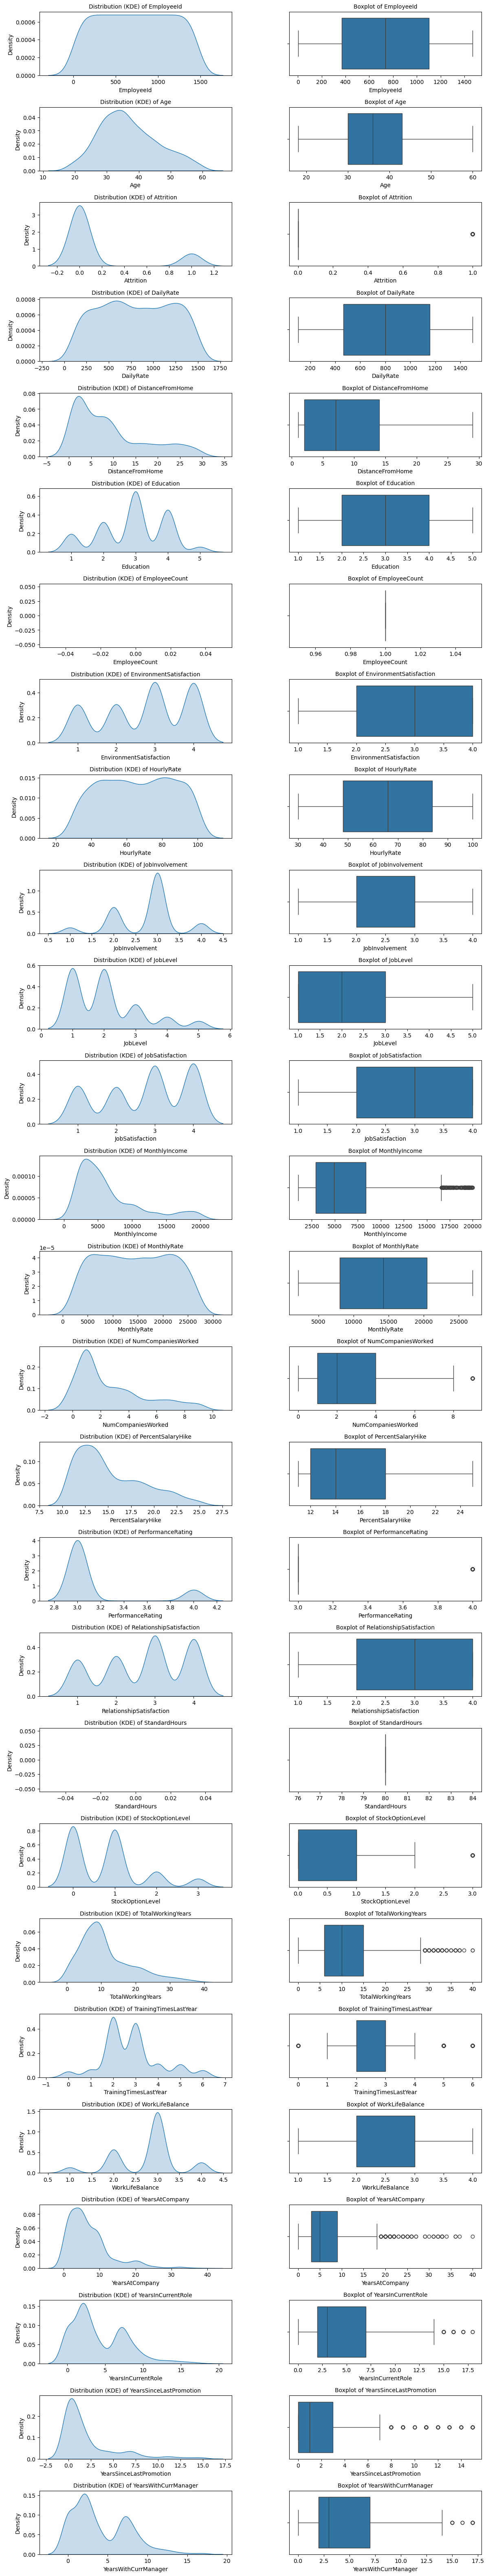

In [13]:
# Pilih kolom numerik dari DataFrame
num_cols = df.select_dtypes(include=['number']).columns

# Hitung jumlah kolom numerik
num_rows = len(num_cols)

# Buat figure dan GridSpec dengan tinggi dinamis
fig = plt.figure(figsize=(14, num_rows * 3))  # Lebar 14, tinggi disesuaikan
grid = plt.GridSpec(num_rows, 2, hspace=0.5, wspace=0.3)  # jarak antar plot

# Loop untuk semua kolom numerik
for i, col in enumerate(num_cols):
    # KDE plot
    kde_ax = fig.add_subplot(grid[i, 0])
    sns.kdeplot(data=df, x=col, fill=True, ax=kde_ax)
    kde_ax.set_title(f'Distribution (KDE) of {col}', fontsize=10)

    # Box plot
    box_ax = fig.add_subplot(grid[i, 1])
    sns.boxplot(x=df[col], ax=box_ax)
    box_ax.set_title(f'Boxplot of {col}', fontsize=10)

# Atur tata letak agar tidak tumpang tindih
plt.tight_layout()
plt.show()

- Berdasarkan ringkasan ini, terdapat outlier yang tampak dalam kumpulan data yaitu pada kolom YearsWithCurrManager, yearsSinceLastPromotion, YearsinCurrentRole, YearsAtCurrentCompany, TotalWorkingYears,NumsCompanyWorked.
- Dalam kumpulan data ini, nilai tersebut tidak hanya menonjol, tetapi juga merupakan nilai tinggi namun tidak mustahil sehingga outlier tidak dihapus, mengecualikan nilai ekstrem hanya karena ekstremitasnya dapat mendistorsi hasil dengan menghilangkan informasi.

In [14]:
#Show the number of unique observations for each column
df.nunique()

EmployeeId                  1470
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

## Data Preparation / Preprocessing

**Nilai yang hilang dilakukan pengedropan**

In [15]:
# Drop rows with any missing values
df = df.dropna()

In [16]:
df.shape

(1058, 35)

**Analisis distribusi kelas 0 dan 1 pada target `Attrition`**

In [17]:
# the data is highly imbalanced
df['Attrition'].value_counts()

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

In [18]:
# Assuming 'df' is your DataFrame and 'Attrition' is the column you want to modify.
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})
df['Attrition'] = df['Attrition'].map({1: 'Yes', 0: 'No'})

In [19]:
# the data is highly imbalanced
df['Attrition'].value_counts()

Attrition
No     879
Yes    179
Name: count, dtype: int64

In [20]:
attrition_percentage = df['Attrition'].value_counts(normalize=True) * 100
attrition_percentage

Attrition
No     83.081285
Yes    16.918715
Name: proportion, dtype: float64

## Data Types

In [21]:
# check data types
df.dtypes

EmployeeId                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Semua kolom memiliki tipe data yang sesuai, memastikan bahwa data diformat dengan benar untuk analisis.

menghapus kolom Employeecount dan employeeid

In [22]:
# from the above unique value we can notice that "EmployeeCount" just have 1 unique value, "EmployeeIdr" with its variance (1470), we can drop this columns that has no meaning in our analysis
cols = ["EmployeeCount", "EmployeeId"]
df.drop(columns=cols, inplace=True) # Changed num to cols to only drop specified columns

menghapus kolom "Over18"

In [23]:
# from the above cell we can notice that all the employees are above 18 so we will drop this column
df.drop( columns = ['Over18'], inplace=True)

In [24]:
# "StandardHours" with same value 80 (1470), we can drop this columns that has no meaning in our analysis
df['StandardHours'].value_counts()

StandardHours
80    1058
Name: count, dtype: int64

menghapus kolom "StandarHours"

In [25]:
#from the above cell we can notice that all the StandardHours are all 80 so we will also drop it
df.drop( columns = ['StandardHours'], inplace=True)

## EDA

In [26]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 50)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
1   37       Yes      Travel_Rarely       1141  Research & Development   
2   51       Yes      Travel_Rarely       1323  Research & Development   
3   42        No  Travel_Frequently        555                   Sales   
6   40        No      Travel_Rarely       1124                   Sales   
7   55       Yes      Travel_Rarely        725  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
1                11          2        Medical                        1   
2                 4          4  Life Sciences                        1   
3                26          3      Marketing                        3   
6                 1          2        Medical                        2   
7                 2          3        Medical                        4   

   Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
1  Female          61               1         2  Healthcare Representative   
2    Male          34               3         1         Research Scientist   
3  Female          77               3         4            Sales Executive   
6    Male          57               1         2            Sales Executive   
7    Male          78               3         5                    Manager   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
1                2       Married           4777        14382   
2                3       Married           2461        10332   
3                2       Married          13525        14864   
6                4       Married           7457        13273   
7                1       Married          19859        21199   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
1                   5       No                 15                  3   
2                   9      Yes                 12                  3   
3                   5       No                 14                  3   
6                   2      Yes                 22                  4   
7                   5      Yes                 13                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
1                         1                 0                 15   
2                         3                 3                 18   
3                         4                 1                 23   
6                         3                 3                  6   
7                         4                 1                 24   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1                      2                1               1                   0   
2                      2                4              10                   0   
3                      2                4              20                   4   
6                      2                2               4                   3   
7                      2                3               5                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
1                        0                     0  
2                        2                     7  
3                        4                     8  
6                        0                     2  
7                        1                     4

C:\Users\ekaad\AppData\Local\Temp\ipykernel_25064\3127450386.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = attrition_rate.index, y = attrition_rate.values, palette={'Yes': 'blue', 'No': 'red'})


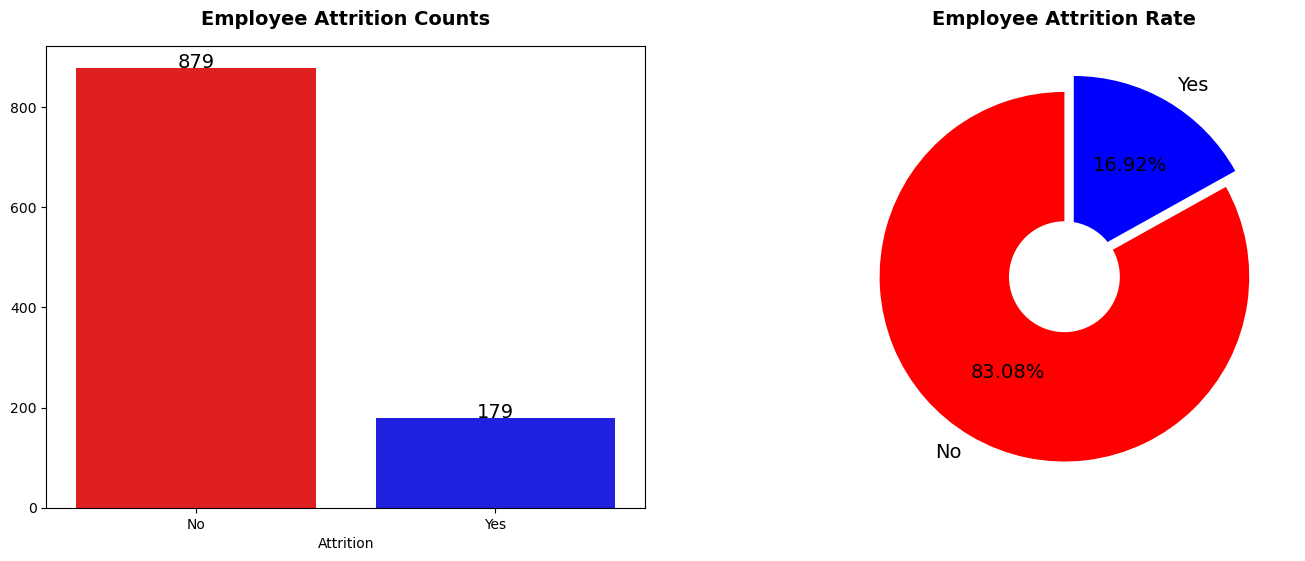

In [27]:
#Visualization to show Employee Attrition in Counts.
plt.figure(figsize = (17,6))
plt.subplot(1,2,1)
attrition_rate = df["Attrition"].value_counts()
sns.barplot(x = attrition_rate.index, y = attrition_rate.values, palette={'Yes': 'blue', 'No': 'red'})
plt.title("Employee Attrition Counts", fontweight="black", size=14, pad=15)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v,ha="center", fontsize=14)

#Visualization to show Employee Attrition in Percentage.
plt.subplot(1,2,2)
colors = sns.color_palette(['red', 'blue'], len(attrition_rate))
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"size":14},
        colors = colors,explode=[0,0.1],startangle=90)
center_circle = plt.Circle((0, 0), 0.3, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate",fontweight="black",size=14 ,pad=15)
plt.show()

**Distribusi Target (`Attrition`)**
- No (Tidak Keluar): 83.08%
- Yes (Keluar): 16.92%

  Artinya, sebagian besar karyawan tidak keluar, tetapi `Attrition` tetap signifikan pada **16.92%** karyawan.

### Average of Tenure

Masa kerja rata-rata mengukur rata-rata jumlah tahun seorang karyawan tinggal di perusahaan sebelum keluar. Hal ini dapat memberikan wawasan tentang stabilitas tenaga kerja dan kepuasan karyawan dalam organisasi.

In [28]:
avg_tenure = df['YearsAtCompany'].mean()
print(f'Average years of employee to leave the company is {avg_tenure} years')

Average years of employee to leave the company is 7.065217391304348 years


Rata-rata masa kerja karyawan sebelum memutuskan keluar adalah 7,01 tahun. Dengan rata-rata masa kerja tersebut, dapat disimpulkan bahwa banyak karyawan yang merasa nyaman dan sudah lama bekerja di perusahaan.

### Employee's Demographics



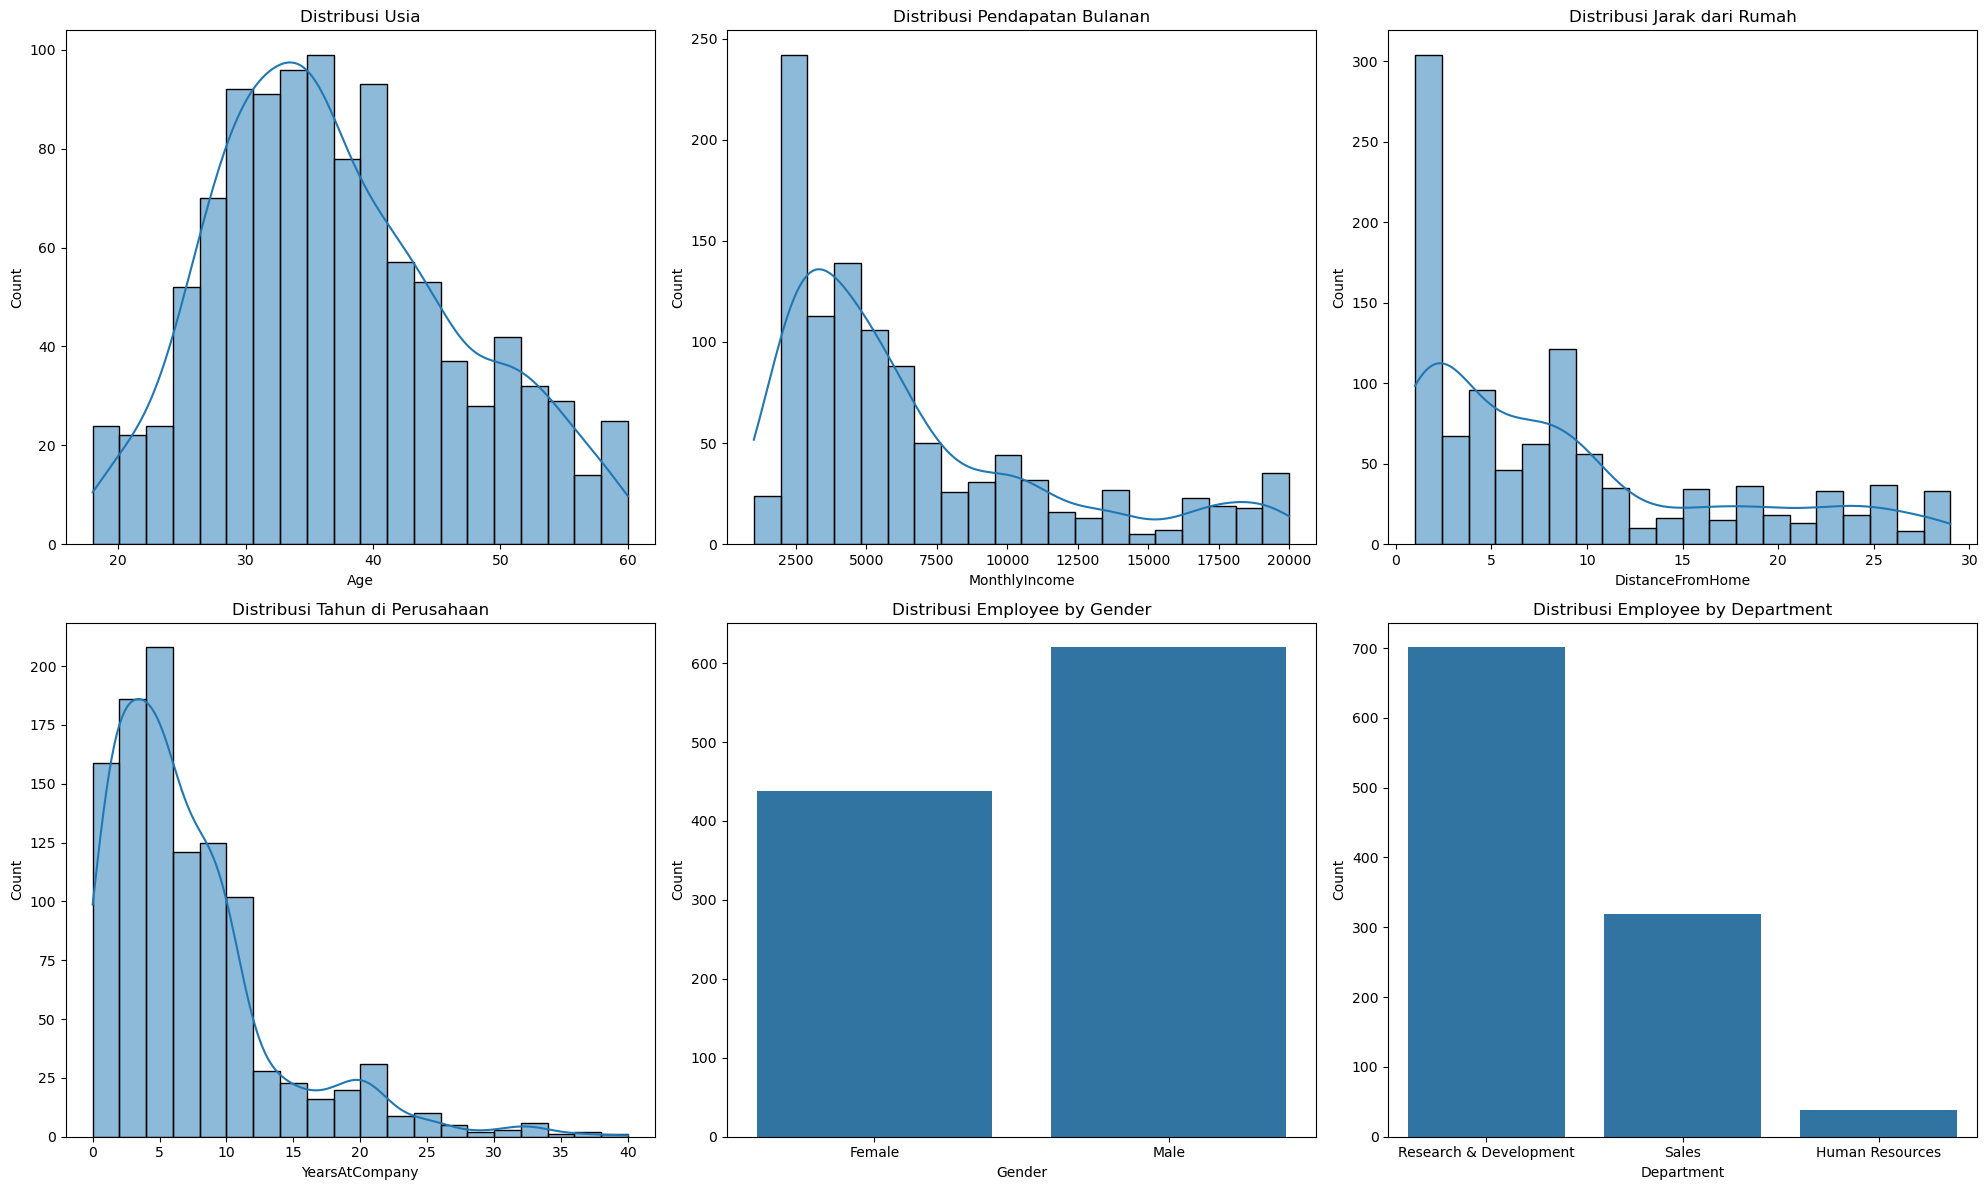

In [29]:
# Visualisasi Data Numerik dan Kategorikal
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# Data numerik
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribusi Usia")

sns.histplot(df["MonthlyIncome"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribusi Pendapatan Bulanan")

sns.histplot(df["DistanceFromHome"], bins=20, kde=True, ax=axes[0, 2])
axes[0, 2].set_title("Distribusi Jarak dari Rumah")

sns.histplot(df["YearsAtCompany"], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribusi Tahun di Perusahaan")

# Data kategorikal
sns.countplot(data=df, x="Gender", ax=axes[1, 1])
axes[1, 1].set_title("Distribusi Employee by Gender")
axes[1, 1].set_xlabel("Gender")
axes[1, 1].set_ylabel("Count")

sns.countplot(data=df, x="Department", ax=axes[1, 2])
axes[1, 2].set_title("Distribusi Employee by Department")
axes[1, 2].set_xlabel("Department")
axes[1, 2].set_ylabel("Count")

plt.tight_layout()
plt.show()

**Distribusi Kolom Numerik**
- `Age`: Rata-rata usia adalah 36.9 tahun.
- `MonthlyIncome`: Pendapatan bulanan bervariasi dari min 1,000 hingga 19,000.
- `DistanceFromHome`: Sebagian besar karyawan tinggal dekat dengan kantor (jarak rata-rata 9 km).
- `YearsAtCompany`: Sebagian besar karyawan bekerja di perusahaan selama 5-9 tahun.
- `Jenis Kelamin`: Mayoritas karyawan di perusahaan ini adalah laki-laki. Jumlah pekerja laki-laki jauh lebih banyak dibandingkan pekerja perempuan.
- `Departemen`: Sebagian besar karyawan perusahaan terkonsentrasi di departemen penelitian dan pengembangan. Hal ini menunjukkan bahwa perusahaan  sangat fokus pada kegiatan penelitian dan pengembangan produk atau jasa.

In [30]:
df_attrition = df[df['Attrition'] == 'Yes']
df_attrition.head()

Age Attrition BusinessTravel  DailyRate              Department  \
1    37       Yes  Travel_Rarely       1141  Research & Development   
2    51       Yes  Travel_Rarely       1323  Research & Development   
7    55       Yes  Travel_Rarely        725  Research & Development   
11   20       Yes  Travel_Rarely        129  Research & Development   
24   24       Yes  Travel_Rarely        813  Research & Development   

    DistanceFromHome  Education    EducationField  EnvironmentSatisfaction  \
1                 11          2           Medical                        1   
2                  4          4     Life Sciences                        1   
7                  2          3           Medical                        4   
11                 4          3  Technical Degree                        1   
24                 1          3           Medical                        2   

    Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
1   Female          61               1         2  Healthcare Representative   
2     Male          34               3         1         Research Scientist   
7     Male          78               3         5                    Manager   
11    Male          84               3         1      Laboratory Technician   
24    Male          61               3         1         Research Scientist   

    JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
1                 2       Married           4777        14382   
2                 3       Married           2461        10332   
7                 1       Married          19859        21199   
11                1        Single           2973        13008   
24                4       Married           2293         3020   

    NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
1                    5       No                 15                  3   
2                    9      Yes                 12                  3   
7                    5      Yes                 13                  3   
11                   1       No                 19                  3   
24                   2      Yes                 16                  3   

    RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
1                          1                 0                 15   
2                          3                 3                 18   
7                          4                 1                 24   
11                         2                 0                  1   
24                         1                 1                  6   

    TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1                       2                1               1   
2                       2                4              10   
7                       2                3               5   
11                      2                3               1   
24                      2                2               2   

    YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
1                    0                        0                     0  
2                    0                        2                     7  
7                    2                        1                     4  
11                   0                        0                     0  
24                   0                        2                     0

In [31]:
# Fungsi untuk Menghitung Attrition Rate
def calculate_attrition_rate(df, column):
    attrition_counts = df.groupby([column, 'Attrition']).size().unstack(fill_value=0)
    attrition_rate = attrition_counts['Yes'] / attrition_counts.sum(axis=1) * 100
    attrition_rate_df = attrition_rate.reset_index()
    attrition_rate_df.columns = [column, 'AttritionRate']
    return attrition_rate_df

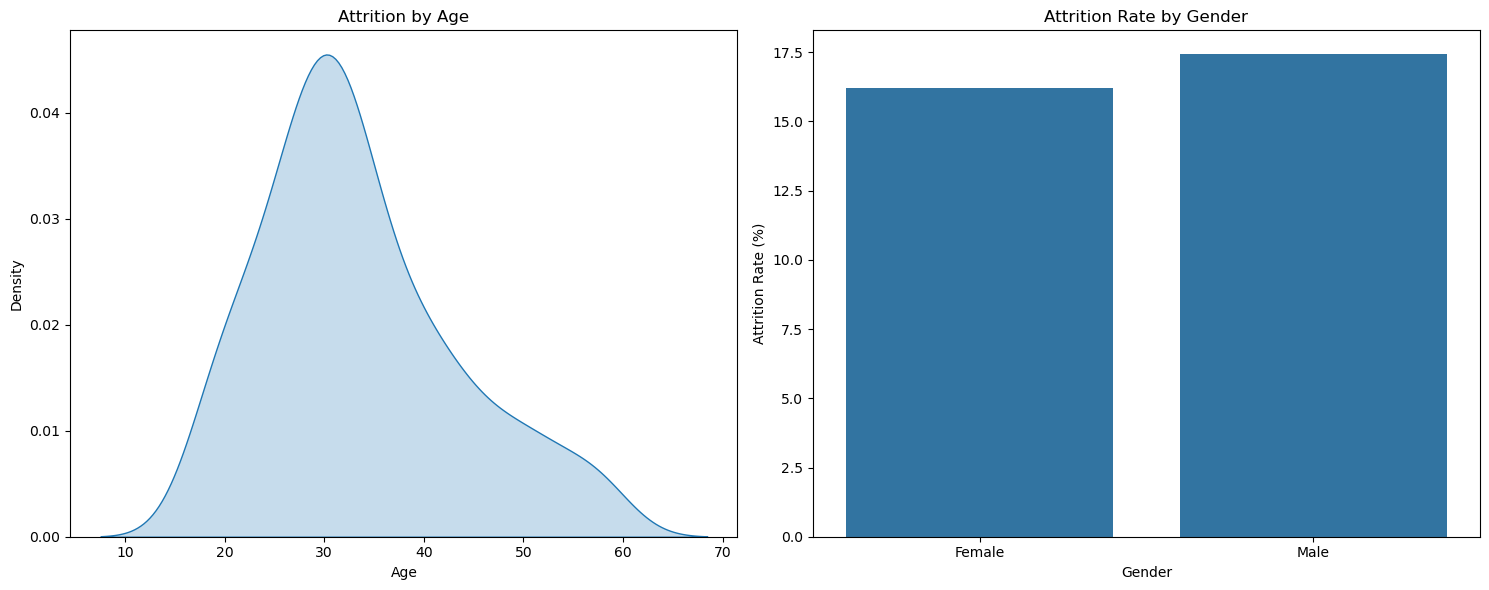

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# Plot 1: KDE plot of Age with Attrition hue
sns.kdeplot(data=df_attrition, x='Age', fill=True, ax=axes[0])
axes[0].set_title('Attrition by Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Density')

# Plot 2: Bar plot of Gender count with Attrition hue
attrition_rate_df = calculate_attrition_rate(df, 'Gender')
sns.barplot(data=attrition_rate_df, x='Gender', y='AttritionRate', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Attrition Rate (%)')

plt.tight_layout()
plt.show()

- Karyawan yang lebih muda, terutama yang berada dalam kelompok usia 30-35 tahun, tampaknya lebih besar kemungkinannya untuk meninggalkan perusahaan dibandingkan kelompok usia lainnya. Hal ini dapat disebabkan oleh sejumlah faktor, termasuk pencarian pengalaman baru, ketidakpuasan terhadap gaji atau jalur karier, atau tawaran pekerjaan yang lebih menarik di tempat lain.
- Karyawan yang lebih tua cenderung memiliki stabilitas kerja yang lebih baik. Hal ini mungkin disebabkan oleh beberapa faktor, seperti tingkat komitmen yang lebih tinggi terhadap perusahaan, sulitnya mendapatkan pekerjaan baru di usia yang lebih tua, atau adanya manfaat pensiun yang bersifat wajib. Pengurangan berdasarkan Gender

Terdapat perbedaan yang signifikan dalam tingkat turnover antara laki-laki dan perempuan. Pegawai laki-laki cenderung lebih sering mengundurkan diri dibandingkan pegawai perempuan. Namun hal ini mungkin disebabkan oleh ketidakseimbangan sampel pada kedua kelompok.

In [33]:
education_mapping = {1 : 'Below College',
                     2 : 'College',
                     3 : 'Bachelor',
                     4 : 'Master',
                     5 : 'Doctor'}

df['education_cat'] = df['Education'].replace(education_mapping)
df['education_cat']

1             College
2              Master
3            Bachelor
6             College
7            Bachelor
8       Below College
9             College
10      Below College
11           Bachelor
13             Doctor
14           Bachelor
15           Bachelor
16             Master
17            College
19            College
20           Bachelor
21           Bachelor
22            College
23            College
24           Bachelor
27             Master
28            College
30      Below College
31             Master
32           Bachelor
33           Bachelor
34             Master
35             Doctor
36           Bachelor
38           Bachelor
39             Master
40             Master
41           Bachelor
42           Bachelor
43            College
44           Bachelor
45           Bachelor
48           Bachelor
49      Below College
50           Bachelor
53           Bachelor
54           Bachelor
56           Bachelor
57           Bachelor
58             Master
59        

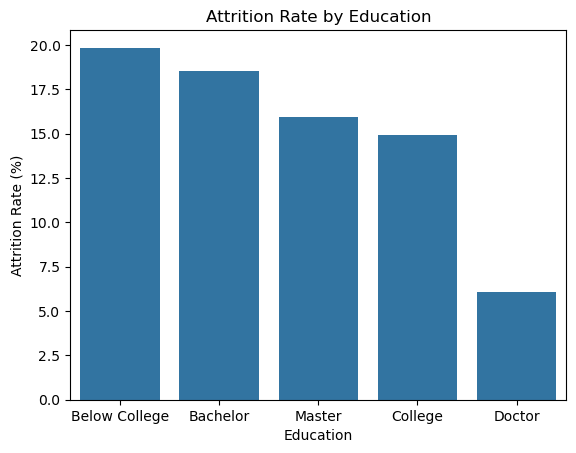

In [34]:
attrition_rate_df = calculate_attrition_rate(df, 'education_cat')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='education_cat', y='AttritionRate')
plt.title(f'Attrition Rate by Education')
plt.xlabel('Education')
plt.ylabel('Attrition Rate (%)')

plt.show()

Dalam analisis ini, karyawan dengan tingkat pendidikan yang lebih tinggi cenderung memiliki tingkat loyalitas yang lebih tinggi terhadap perusahaan. Hal ini dibuktikan dengan rendahnya tingkat turnover pada pegawai bergelar magister dan doktoral. Namun analisis lebih lanjut diperlukan untuk mengetahui apakah peningkatan tingkat pendidikan cenderung meningkatkan kemungkinan bertahan di perusahaan.

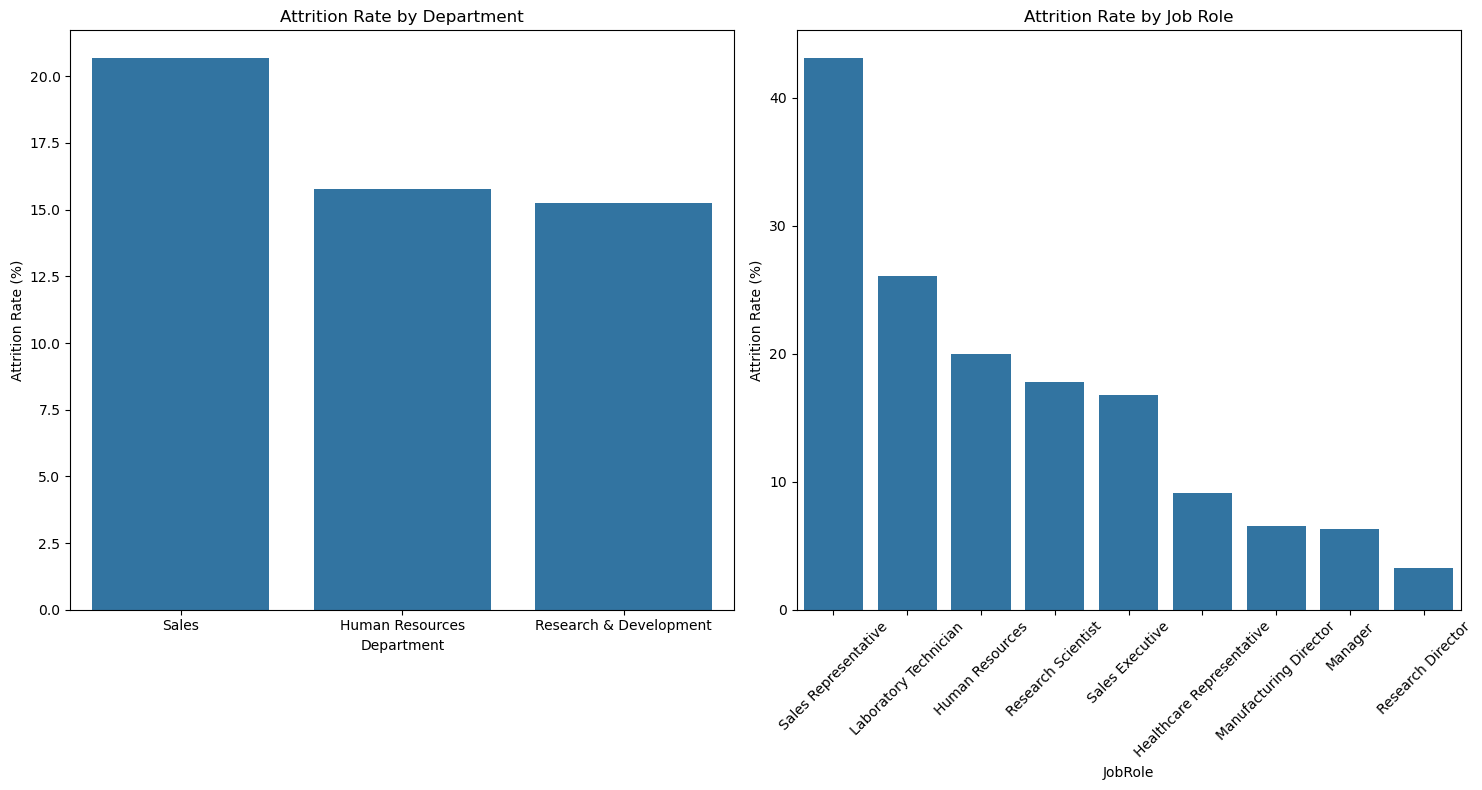

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,8))

# Plot 1: KDE plot of Age with Attrition hue
attrition_rate_df = calculate_attrition_rate(df, 'Department')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='Department', y='AttritionRate', ax=axes[0])
axes[0].set_title(f'Attrition Rate by Department')
axes[0].set_xlabel('Department')
axes[0].set_ylabel('Attrition Rate (%)')

# Plot 2: Bar plot of Gender count with Attrition hue
attrition_rate_df = calculate_attrition_rate(df, 'JobRole')
attrition_rate_df = attrition_rate_df.sort_values(by='AttritionRate', ascending=False)
sns.barplot(data=attrition_rate_df, x='JobRole', y='AttritionRate', ax=axes[1])
axes[1].set_title(f'Attrition Rate by Job Role')
axes[1].set_xlabel('JobRole')
axes[1].set_ylabel('Attrition Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. Departemen penjualan dan posisi perwakilan penjualan dan teknisi laboratorium memiliki tingkat pergantian yang tinggi. Hal ini mungkin disebabkan oleh faktor-faktor seperti tekanan kerja yang tinggi, tujuan penjualan yang tidak dapat dicapai, atau kurangnya kepuasan kerja.
2. Departemen penelitian dan pengembangan serta posisi ilmuwan riset dan direktur penelitian memiliki tingkat pergantian yang rendah. Hal ini mungkin disebabkan oleh sifat pekerjaan yang menantang, peluang yang lebih besar untuk pengembangan karir, atau lingkungan kerja yang lebih mendukung.

Berdasarkan analisis grafik di atas dapat disimpulkan bahwa tingkat turnover dipengaruhi oleh departemen dan jabatan yang dijabat. Karyawan di departemen penjualan dan mereka yang memegang posisi perwakilan penjualan dan teknisi laboratorium cenderung lebih sering meninggalkan perusahaan dibandingkan karyawan di departemen penelitian dan pengembangan dan mereka yang memegang posisi ilmuwan riset dan direktur penelitian. Perbedaan ini mungkin disebabkan oleh faktor-faktor seperti tekanan kerja, peluang pengembangan karir, dan kepuasan kerja.

### Satisfaction Factors

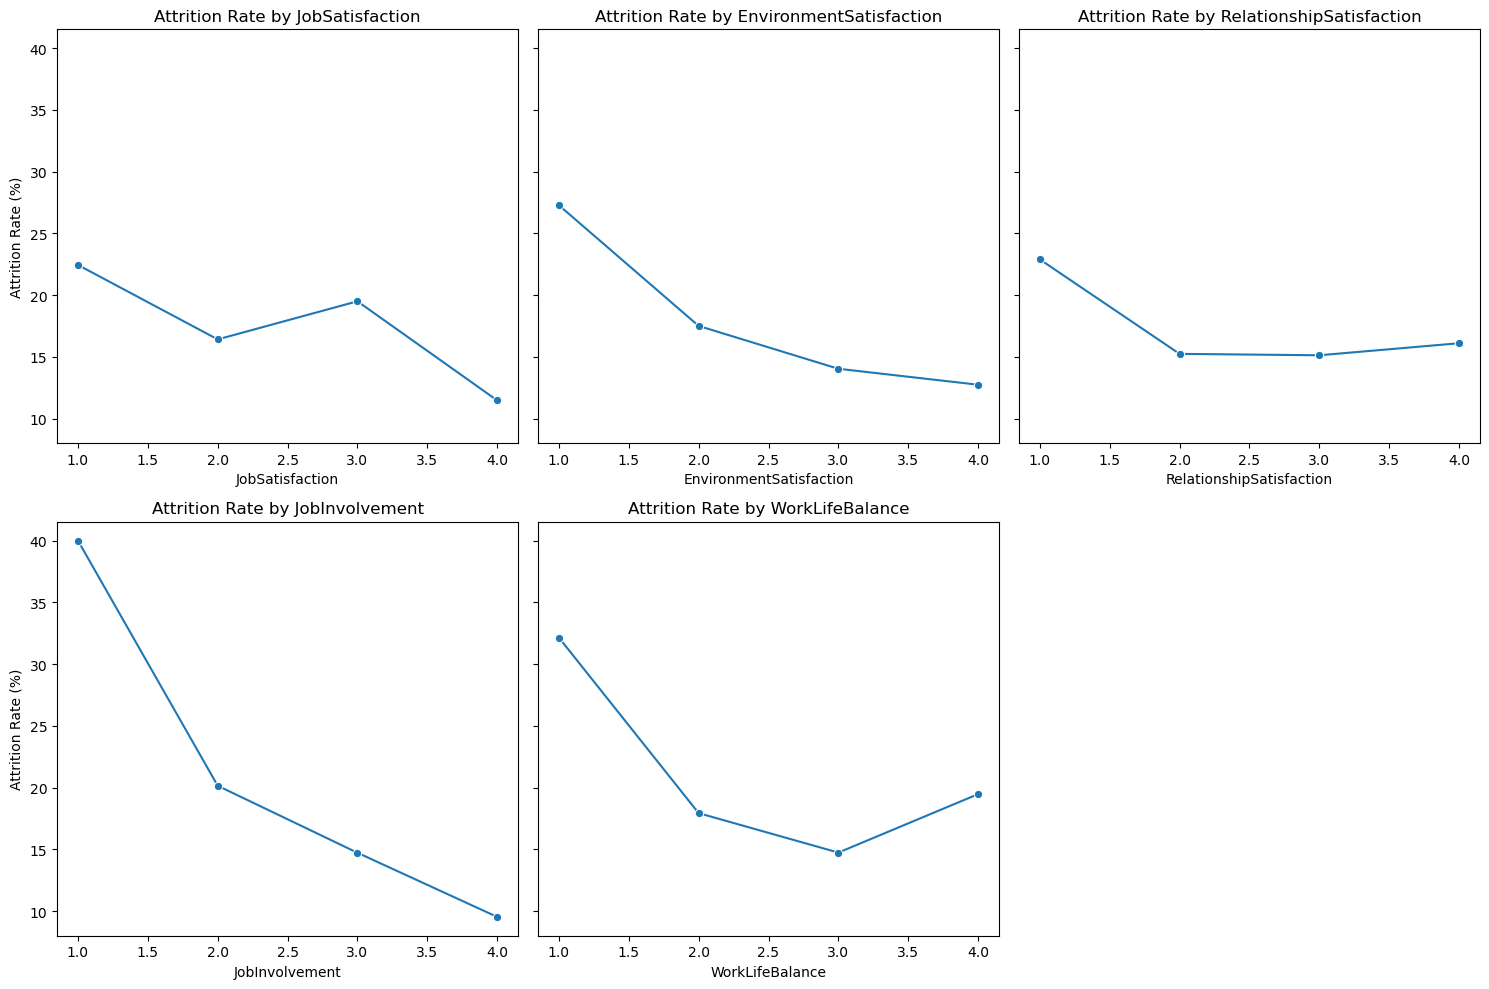

In [36]:
# Daftar kolom kepuasan yang ingin divisualisasikan
satisfaction_cols = [
    'JobSatisfaction', 'EnvironmentSatisfaction',
    'RelationshipSatisfaction', 'JobInvolvement',
    'WorkLifeBalance'
]

# Buat figure dan axes untuk subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)

# Flatten axes untuk memudahkan iterasi
axes = axes.flatten()

# Plot masing-masing satisfaction variable
for i, col in enumerate(satisfaction_cols):
    attrition_rate_df = calculate_attrition_rate(df, col)
    sns.lineplot(data=attrition_rate_df, x=col, y='AttritionRate', marker='o', ax=axes[i])
    axes[i].set_title(f'Attrition Rate by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Attrition Rate (%)')

# Hapus subplot kosong jika jumlahnya tidak genap
if len(satisfaction_cols) % 2 != 0:
    fig.delaxes(axes[-1])

# Tambahkan padding antara plots
plt.tight_layout()
plt.show()

- Kepuasan Kerja: Karyawan dengan tingkat kepuasan kerja yang rendah cenderung lebih sering keluar. Hal ini menunjukkan bahwa aspek pekerjaan itu sendiri, seperti tugas, tanggung jawab, dan tantangan, sangat mempengaruhi keputusan karyawan untuk tetap tinggal atau keluar.
- Kepuasan Lingkungan: Lingkungan kerja yang tidak nyaman, tidak mendukung, atau tidak konsisten dengan nilai-nilai karyawan dapat mendorong mereka untuk mencari pekerjaan di tempat lain.
- Kepuasan hubungan: Hubungan yang baik dengan rekan kerja dan supervisor dapat meningkatkan rasa memiliki dan loyalitas terhadap organisasi, sehingga mengurangi turnover.
- Keterlibatan Kerja: Karyawan yang merasa terlibat dalam pekerjaannya cenderung lebih loyal dan berkomitmen terhadap organisasi.
- Keseimbangan kehidupan kerja: Keseimbangan kehidupan kerja yang baik sangat penting bagi karyawan. Karyawan yang merasa pekerjaannya mengganggu kehidupan pribadinya lebih besar kemungkinannya untuk keluar dari perusahaan.


Selain itu, hasil analisis menunjukkan adanya korelasi yang kuat antara tingkat keterlibatan kerja dengan tingkat turnover. Karyawan dengan tingkat keterlibatan kerja yang rendah cenderung lebih sering meninggalkan organisasi. Hal ini menunjukkan bahwa kurangnya keterlibatan kerja, yang mungkin disebabkan oleh kurangnya peluang pengembangan karir atau kurangnya tantangan dalam pekerjaan, dapat mendorong karyawan untuk mencari pekerjaan yang lebih memuaskan di tempat lain.

### Salary and Benefit Factors

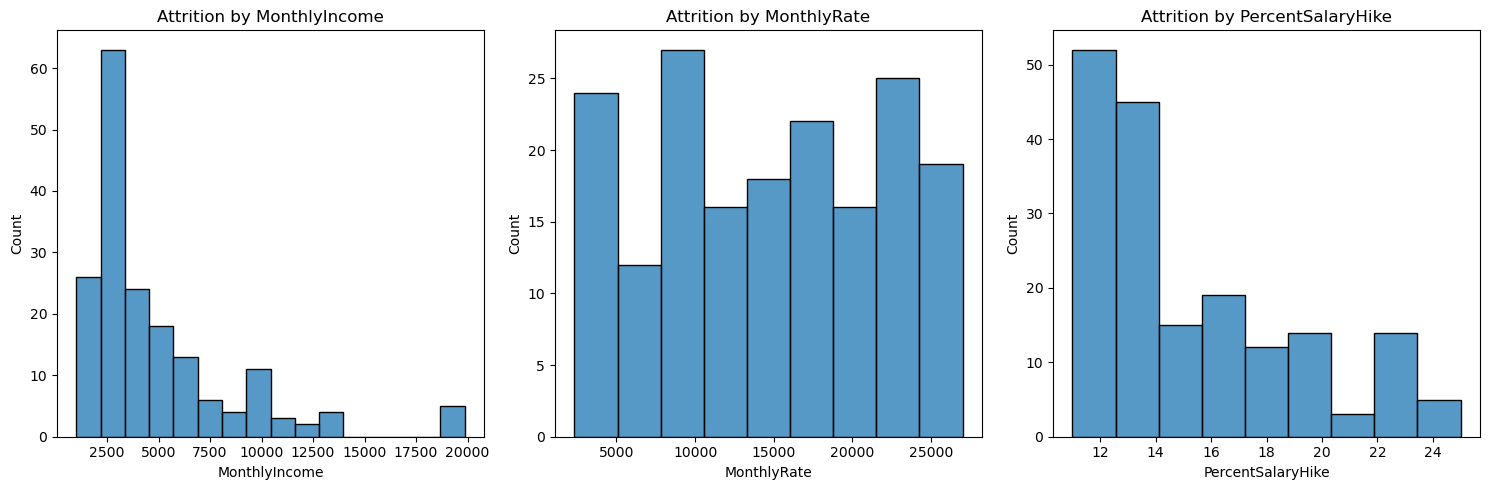

In [37]:
salary_col = ['MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i, col in enumerate(salary_col):
    sns.histplot(data=df_attrition, x=col, ax=axes[i])
    axes[i].set_title(f'Attrition by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

Turnover berdasarkan pendapatan bulanan

- Grafik ini menunjukkan bahwa sebagian besar karyawan yang keluar memiliki pendapatan bulanan di kisaran 5.000 hingga 7.500.
- Terdapat penurunan tingkat turnover yang signifikan pada karyawan dengan pendapatan bulanan di atas 7.500, yang menunjukkan bahwa karyawan dengan gaji lebih tinggi cenderung bertahan lebih lama di perusahaan.

Turnover berdasarkan Tarif Bulanan:
- Grafik turnover menurut Tarif Bulanan tidak menunjukkan pola yang jelas antara tingkat gaji dan tingkat turnover.
- Perputaran berfluktuasi secara acak pada rentang gaji yang berbeda.

Turnover berdasarkan Persen Kenaikan Gaji:

- Grafik ini menunjukkan bahwa karyawan yang menerima kenaikan gaji lebih rendah (di bawah 16%) cenderung memiliki tingkat turnover yang lebih tinggi.
- Semakin tinggi persentase kenaikannya maka semakin rendah tingkat turnovernya. Hal ini menunjukkan bahwa kenaikan gaji yang signifikan dapat menjadi faktor retensi yang efektif.

## Questions to Answer

1. Apa saja faktor utama yang menyebabkan attrition karyawan?
2. Bagaimana MonthlyIncome bervariasi di berbagai departemen dan JobRole?
3. Apakah ada korelasi antara YearsAtCompany dan Attrition?
4. Bagaimana StockOption berbeda menurut JobRole?
5. Apa dampak Lembur terhadap kinerja karyawan (PerformanceRating)?
6. Apakah ada pola dalam Attrition berdasarkan frekuensi BusinessTravel?
7. Jabatan mana yang memiliki rata-rata YearsAtCompany tertinggi?
8. Apakah ada hubungan antara EducationField dan PerformanceRating?
9. Bagaimana DistanceFromHome memengaruhi attrition karyawan?
10. Bagaimana Usia mempengaruhi atrisi?

### Q1.	Apa saja faktor utama yang menyebabkan attrition karyawan?

In [38]:
# Plot dengan perbaikan visual
fig = px.histogram(
    df,
    x='JobRole',
    color='Attrition',
    barmode='group',
    facet_col='OverTime',
    facet_row='WorkLifeBalance',
    text_auto='.2s',  # menampilkan angka di atas bar
    color_discrete_map={'Yes': '#EF553B', 'No': '#00CC96'},  # warna lebih profesional
    title='Attrition by Job Role, OverTime, and Work-Life Balance'
)


fig.update_layout(
    xaxis_title='Job Role',
    yaxis_title='Count',
    height=900,
    font=dict(size=12),
    title_x=0.5,
    legend_title_text='Attrition'
)

# Rotasi label sumbu X agar tidak tumpang tindih
fig.update_xaxes(tickangle=45)

# Tampilkan plot
fig.show()

- Karyawan yang bekerja lembur sebagai Ilmuwan Riset, Teknisi Lab, dan Eksekutif Penjualan cenderung meninggalkan perusahaan meskipun mereka memiliki Keseimbangan Kehidupan Kerja yang lebih baik bisa dilihat pada WorkLifeBalance tingkat 3.

C:\Users\ekaad\AppData\Local\Temp\ipykernel_25064\733012595.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




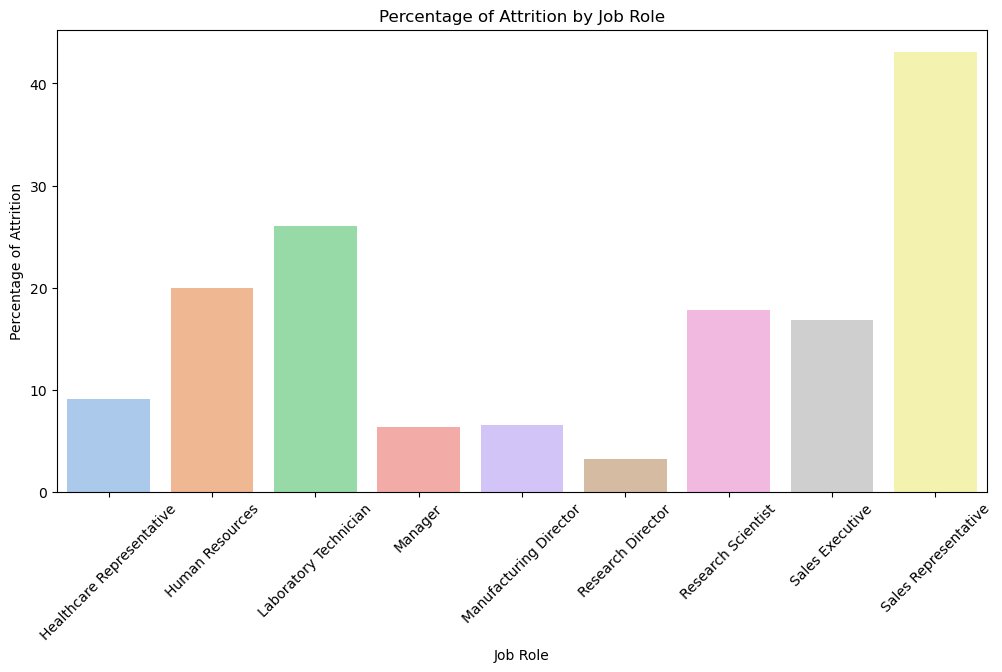

In [39]:
attrition_by_role = df[df['Attrition'] == 'Yes'].groupby('JobRole').size() / df.groupby('JobRole').size() * 100

attrition_by_role = attrition_by_role.reset_index()
attrition_by_role.columns = ['JobRole', 'Attrition (%)']

plt.figure(figsize=(12, 6))
sns.barplot(x='JobRole', y='Attrition (%)', data=attrition_by_role, palette='pastel')
plt.xlabel('Job Role')
plt.ylabel('Percentage of Attrition')
plt.title('Percentage of Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()


- sales memiliki attrition yang paling tinggi, mungkin karena sales memiliki tekanan kerja yang lebih tinggi dari kebanyakan. sedangkan selanjutnya adalah sumber daya manusia dan teknisi laboratorium

C:\Users\ekaad\AppData\Local\Temp\ipykernel_25064\1853510110.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




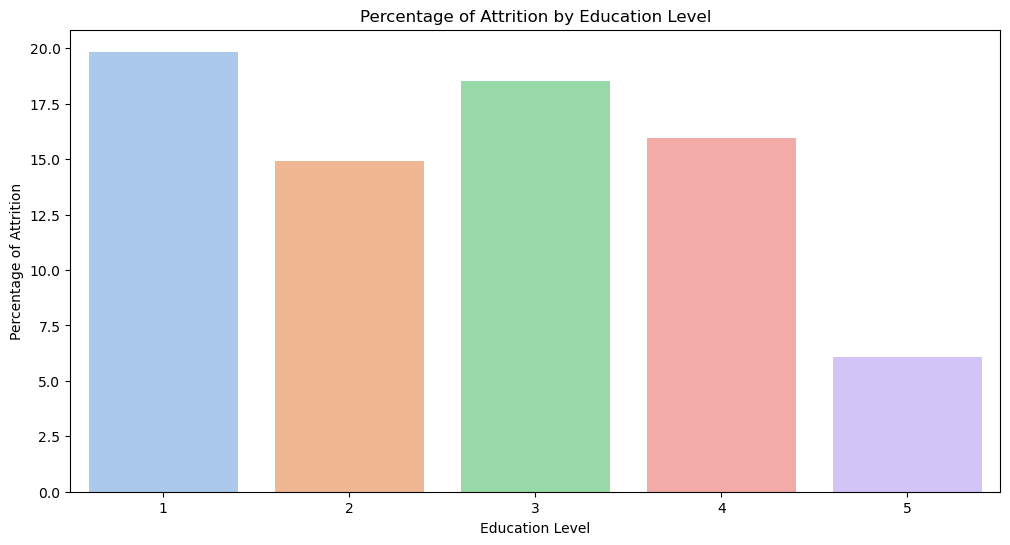

In [40]:
attrition_by_education = df[df['Attrition'] == 'Yes'].groupby('Education').size() / df.groupby('Education').size() * 100

attrition_by_education = attrition_by_education.reset_index()
attrition_by_education.columns = ['Education', 'Attrition (%)']
plt.figure(figsize=(12, 6))
sns.barplot(x='Education', y='Attrition (%)', data=attrition_by_education, palette='pastel')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Attrition')
plt.title('Percentage of Attrition by Education Level')
plt.show()


seiring dengan semakin tingginya pendidikan, semakin rendah tingkatnya, dokter memiliki angka yang paling rendah sementara di bawah perguruan tinggi memiliki angka yang lebih tinggi. mungkin karyawan yang berpendidikan lebih tinggi mungkin lebih mungkin untuk menemukan peran pekerjaan yang selaras dengan tujuan karier mereka

### Q2. Bagaimana MonthlyIncome bervariasi di berbagai departemen dan JobRole?

In [41]:
fig = px.histogram(df, x='Department', y='MonthlyIncome', color='Department',
             title="Average Monthly Income Across Different Departments",histfunc='avg' )
fig.update_layout(xaxis_title='Department', yaxis_title='Monthly Income')
fig.show()

Semua Departemen memiliki pendapatan rata-rata bulanan yang relatif mendekati 7 ribu, namun dengan urutan sebagai berikut:

1. Human Resources menempati posisi tertinggi dalam pendapatan bulanan rata-rata.
   - Hal ini bisa mencerminkan tingginya valuasi posisi HR di perusahaan ini, atau adanya jabatan senior di departemen tersebut.

2. Sales berada di posisi tengah.

   - Bisa jadi menunjukkan insentif tetap yang cukup kompetitif, meskipun tidak setinggi HR.

3. Research & Development memiliki pendapatan rata-rata terendah.
   - Menarik karena umumnya R&D dianggap krusial. Ini mungkin mengindikasikan adanya dominasi posisi junior di departemen ini, atau struktur gaji yang      berbeda.

Insight Tambahan yang Dapat Ditarik:
Distribusi gaji antar departemen berbeda, tetapi tidak terlalu ekstrem, sehingga attrition kemungkinan besar tidak hanya dipengaruhi oleh gaji, tetapi oleh faktor lain seperti:

- OverTime
- Work-Life Balance
- Career Path/Jenjang Karier
- Job Role (jabatan spesifik)

In [42]:
fig = px.histogram(df, y='MonthlyIncome', x='JobRole', color='Department',
             title="Average Monthly Income Across Different Job Roles", histfunc='avg', barmode='group')
fig.update_layout(xaxis_title='Job Role', yaxis_title='MonthlyIncome', height=600)
fig.show()

 - Penghasilan bulanan rata-rata untuk manager di berbagai jabatan dan departemen di atas 17 ribu
 - Penghasilan bulanan rata-rata untuk HR adalah 4,57 ribu
 - untuk Sales Executive adalah 6,9 ribu sementara Rep. 2,6 ribu

### Q3. Apakah ada korelasi antara YearsAtCompany dan Attrition?

In [43]:
# Group by YearsAtCompany and Attrition, then count occurrences
count_df = df.groupby(["YearsAtCompany", 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each YearsAtCompany
total_counts = df.groupby('YearsAtCompany').size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on="YearsAtCompany")
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

# Create line plot using Plotly Express
fig = px.line(
    count_df,
    x="YearsAtCompany",
    y='Percentage',
    color='Attrition',
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage Line Plot of YearsAtCompany Grouped by Attrition'
)

# Customize the plot
fig.update_layout(
    xaxis_title="YearsAtCompany",
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified"
)

# Show plot
fig.show()

C:\Users\ekaad\AppData\Local\Temp\ipykernel_25064\3576101202.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




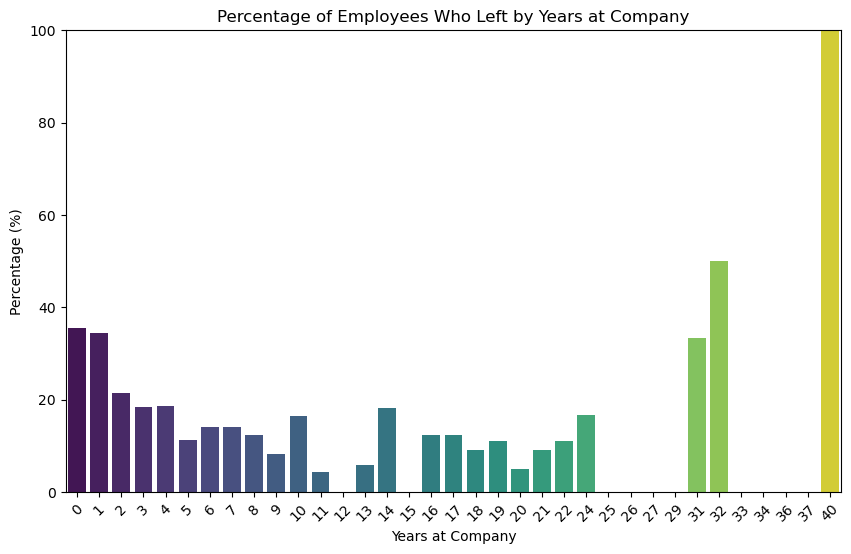

In [44]:
df_left = df[df['Attrition'] == 'Yes']

# Count the total number of employees and the number of employees who left for each year
total_counts = df.groupby('YearsAtCompany').size()
left_counts = df_left.groupby('YearsAtCompany').size()

# Calculate percentages
percentages = (left_counts / total_counts * 100).fillna(0).reset_index(name='Percentage')
plt.figure(figsize=(10, 6))
sns.barplot(data=percentages, x='YearsAtCompany', y='Percentage', palette='viridis')

# Customizing the plot
plt.title('Percentage of Employees Who Left by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)  # Set y-axis limit to 100% for better visualization
plt.show()


- karyawan baru cenderung bertahan lebih lama dibandingkan karyawan yang sudah lama bekerja kecuali pada dua tahun pertama karena 40% keluar pada dua tahun pertama.

<Figure size 1000x600 with 0 Axes>

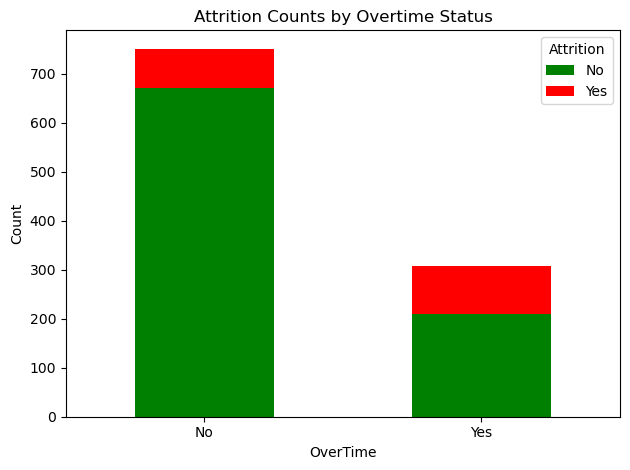

In [45]:
attrition_counts = df.groupby(['OverTime', 'Attrition']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))
attrition_counts.plot(kind='bar', stacked=True, color={'Yes': 'red', 'No': 'green'})
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.title('Attrition Counts by Overtime Status')
plt.legend(title='Attrition')
plt.xticks(rotation=0)
plt.tight_layout();
plt.show();


- 30% Karyawan yang bekerja lembur cenderung meninggalkan perusahaan

C:\Users\ekaad\AppData\Local\Temp\ipykernel_25064\1975138634.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




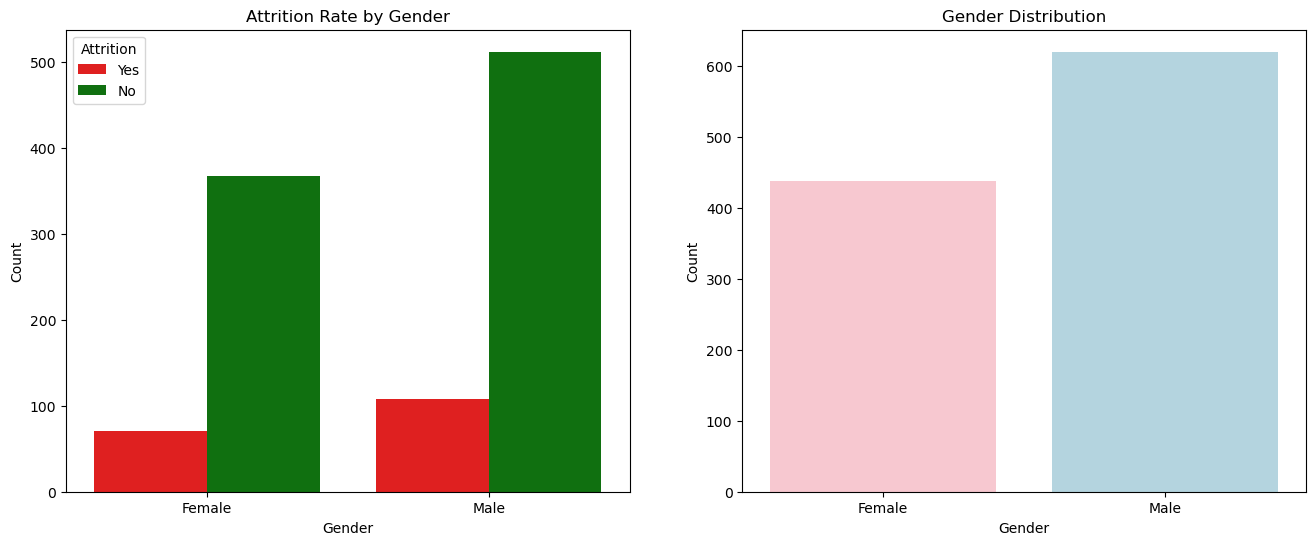

In [46]:
#seeing attrition by gender
attrition_palette = {'Yes': 'red', 'No': 'green'}
gender_palette = {'Male': 'lightblue', 'Female': 'pink'}

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Attrition by Gender
sns.countplot(x='Gender', hue='Attrition', data=df, palette=attrition_palette, ax=axes[0])
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Attrition Rate by Gender')

#Count of Male and Female Employees
sns.countplot(x='Gender', data=df, palette=gender_palette, ax=axes[1])
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_title('Gender Distribution')

plt.show()

- laki-laki cenderung memiliki lebih banyak atrisi tetapi itu hanya karena jumlah mereka lebih banyak daripada perempuan.
- secara keseluruhan laki-laki meninggalkan 16% sementara perempuan meninggalkan 14%. jadi jenis kelamin tidak berpengaruh

C:\Users\ekaad\AppData\Local\Temp\ipykernel_25064\2004884461.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




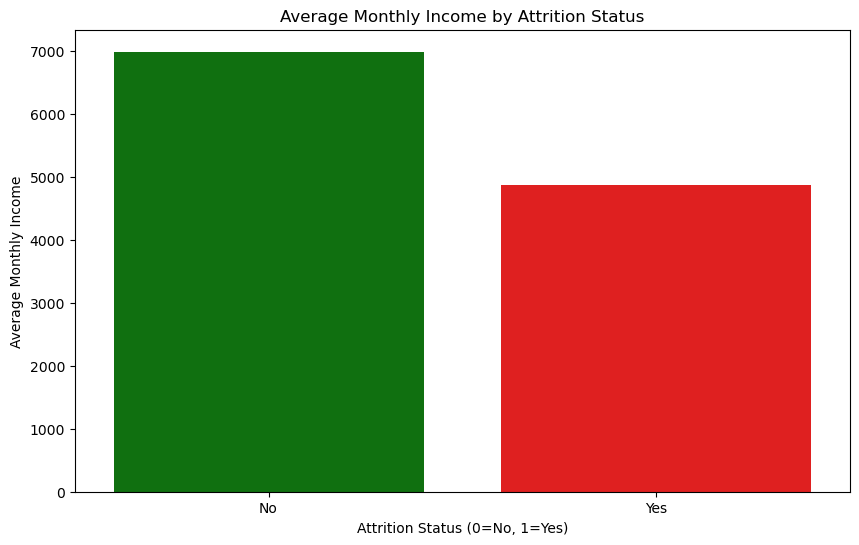

In [47]:
average_income_by_attrition = df.groupby('Attrition')['MonthlyIncome'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Attrition', y='MonthlyIncome', data=average_income_by_attrition, palette={'Yes': 'red', 'No': 'green'})
plt.title('Average Monthly Income by Attrition Status')
plt.xlabel('Attrition Status (0=No, 1=Yes)')
plt.ylabel('Average Monthly Income')
plt.show()

- pendapatan bulanan rata-rata berdasarkan gesekan, orang-orang yang dibayar lebih rendah lebih mungkin untuk keluar

C:\Users\ekaad\AppData\Local\Temp\ipykernel_25064\380580998.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




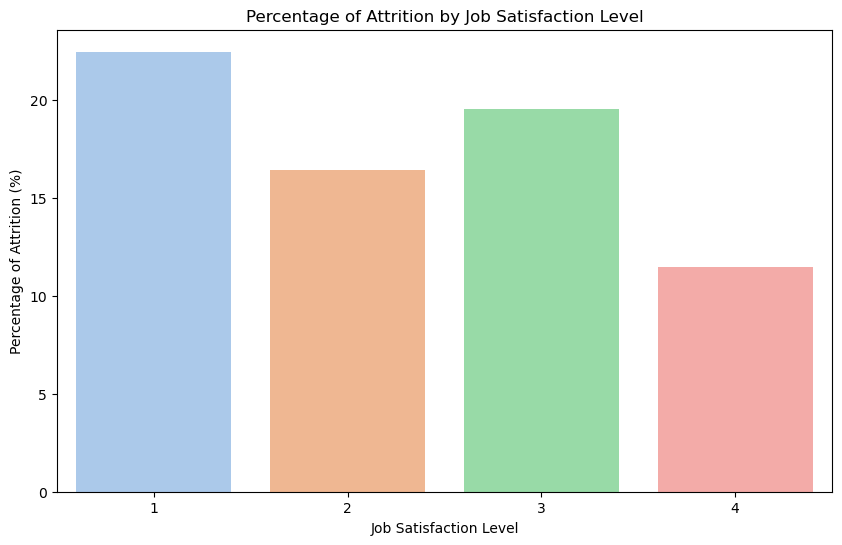

In [48]:
attrition_by_satisfaction = df[df['Attrition'] == 'Yes'].groupby('JobSatisfaction').size() / df.groupby('JobSatisfaction').size() * 100
attrition_by_satisfaction = attrition_by_satisfaction.reset_index()
attrition_by_satisfaction.columns = ['JobSatisfaction', 'Attrition (%)']

plt.figure(figsize=(10, 6))
sns.barplot(x='JobSatisfaction', y='Attrition (%)', data=attrition_by_satisfaction, palette='pastel')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Percentage of Attrition (%)')
plt.title('Percentage of Attrition by Job Satisfaction Level')
plt.show()


- Kepuasan kerja yang lebih rendah berarti lebih banyak orang yang keluar

C:\Users\ekaad\AppData\Local\Temp\ipykernel_25064\1475576049.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




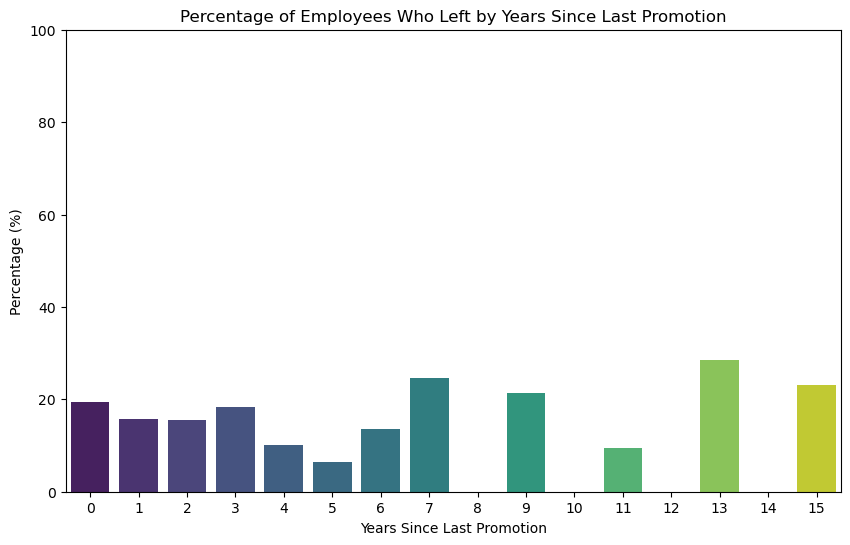

In [49]:
# Filter for employees who have left the company
df_left = df[df['Attrition'] == 'Yes']
total_counts = df.groupby('YearsSinceLastPromotion').size()
left_counts = df_left.groupby('YearsSinceLastPromotion').size()
percentages = (left_counts / total_counts * 100).fillna(0).reset_index(name='Percentage')
plt.figure(figsize=(10, 6))
sns.barplot(data=percentages, x='YearsSinceLastPromotion', y='Percentage', palette='viridis')
plt.title('Percentage of Employees Who Left by Years Since Last Promotion')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 100% for better visualization
plt.show()


- promosi tampaknya tidak memiliki pola dan tidak berpengaruh terhadap keluarnya karyawan

### Q4. Apa perbedaan StockOption dengan JobRole?

In [50]:
fig = px.histogram(df, y='JobRole', x='StockOptionLevel', color='StockOptionLevel', histfunc="count",
             title="Stock Option Level by Job Role", text_auto=True)
fig.update_layout(xaxis_title='Stock Option Level', yaxis_title='Job Role')
fig.show()

Dari grafik ini dapat ditarik beberapa kesimpulan:

1. Mayoritas karyawan di semua Job Role memiliki Stock Option Level 0, artinya tidak semua peran diberi insentif saham.

2. Beberapa peran seperti:
   - Sales Executive,
   - Laboratory Technician, dan
   - Research Scientist
     memiliki persentase tinggi pada Stock Option Level 1–3 → indikasi bahwa perusahaan memberi opsi saham sebagai bentuk retensi atau motivasi bagi
     posisi teknikal dan penjualan.  

3. Human Resources dan Healthcare Representative hampir semuanya hanya memiliki Stock Option Level 0–1 → artinya posisi ini cenderung kurang difokuskan dalam pemberian insentif saham.

### Q5. Apa dampak dari Lembur (OverTime) terhadap kinerja karyawan (PerformanceRating)?

In [51]:
fig = px.histogram(df, x='OverTime', y='PerformanceRating', color='PerformanceRating', histfunc="count",
             title="Performance Rating by OverTime")
fig.update_layout(xaxis_title='OverTime', yaxis_title='Performance Rating')
fig.show()

- Tidak ada dampak yang hampir tidak ada pada peringkat kinerja karyawan karena mereka yang lembur dan memiliki peringkat sangat baik(3) atau luar biasa(4) memiliki persentase yang hampir sama 28%

### Q6. Apakah ada pola dalam Attrisi berdasarkan frekuensi BusinessTravel?

In [52]:
fig = px.histogram(df, x='BusinessTravel', color="Attrition", color_discrete_map={"Yes":"red", "No":"green"}, barmode='group',
             title="Attrition by Business Travel Frequency", text_auto=True)
fig.update_layout(xaxis_title='Business Travel', yaxis_title='Count')
fig.show()

- Karyawan yang sering melakukan perjalanan dinas cenderung meninggalkan perusahaan sekitar 25% dari mereka

### Q7. Peran pekerjaan apa yang memiliki rata-rata YearsAtCompany tertinggi?

In [53]:
fig = px.histogram(df, x='JobRole', y='YearsAtCompany', color='JobRole',
             title="Average Years at Company by Job Role",histfunc="avg",
             labels={'YearsAtCompany': 'Average Years at Company'})
fig.update_layout(xaxis_title='Job Role', yaxis_title='Average Years at Company')
fig.show()

- Manajer dan Direktur memiliki rata-rata masa kerja tertinggi di perusahaan dengan 15 tahun dan 10 tahun secara berurutan.


### Q8.  Apakah ada hubungan antara BidangPendidikan dan PendapatanBulanan?

In [54]:
fig = px.histogram(df, x='EducationField', y='MonthlyIncome', color='EducationField', histfunc="avg",
             title="Monthly Income by Education Field")
fig.update_layout(xaxis_title='Education Field', yaxis_title='Monthly Income')
fig.show()

1. Perbedaan Pendapatan Berdasarkan Bidang:
   - Human Resources memiliki pendapatan rata-rata tertinggi dibandingkan bidang lainnya.
   - Technical Degree dan Life Sciences memiliki pendapatan rata-rata yang berada di tengah.
   - Medical dan Other memiliki pendapatan rata-rata yang lebih rendah.

2. Dominasi Human Resources:

   - Human Resources menonjol sebagai bidang dengan pendapatan bulanan tertinggi, menunjukkan bahwa peran dalam manajemen dan pengelolaan SDM mungkin
     lebih dihargai di perusahaan tertentu.

3. Peluang untuk Peningkatan:

   - Mereka yang memiliki latar belakang pendidikan di bidang Medical dan Other mungkin memiliki peluang untuk meningkatkan penghasilan mereka,
     misalnya melalui sertifikasi tambahan atau pindah ke bidang yang lebih menguntungkan.

4. Kesempatan untuk Upskilling:
   - Jika tren ini konsisten di berbagai perusahaan, mungkin ada baiknya untuk mendorong pengembangan keterampilan manajerial atau teknologi untuk
     meningkatkan pendapatan.

### Q9. Bagaimana pengaruh jarak dari rumah (DistanceFromHome) terhadap atrisi karyawan?

In [55]:
# Group by JobLevel and Attrition, then count occurrences
count_df = df.groupby(["DistanceFromHome", 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each JobLevel
total_counts = df.groupby("DistanceFromHome").size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on="DistanceFromHome")
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

# Create line plot using Plotly Express
fig = px.line(
    count_df,
    x="DistanceFromHome",
    y='Percentage',
    color='Attrition',
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage Line Plot of DistanceFromHome Grouped by Attrition'
)

# Customize the plot
fig.update_layout(
    xaxis_title="DistanceFromHome",
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified"
)

# Show plot
fig.show()

Dari grafik "Percentage Line Plot of DistanceFromHome Grouped by Attrition", beberapa insight yang dapat diambil mengenai pengaruh Jarak dari Rumah (DistanceFromHome) terhadap Atrisi Karyawan (Attrition) adalah:

1. Tidak Ada Pola Atrisi yang Jelas Terkait Jarak:
   - Persentase karyawan yang tidak keluar (No) tetap konsisten tinggi di semua rentang jarak, menunjukkan bahwa jarak dari rumah mungkin bukan
     faktor utama dalam keputusan untuk tetap bekerja.

2. Fluktuasi Tingkat Atrisi (Yes):
   - Meskipun garis merah (Yes) menunjukkan beberapa fluktuasi, persentase karyawan yang keluar tetap relatif stabil tanpa pola yang jelas, meski
     sedikit meningkat pada jarak sekitar 20-25 km.

3. Dominasi Retensi:
   - Secara keseluruhan, perusahaan berhasil mempertahankan mayoritas karyawannya di semua jarak, dengan tingkat retensi lebih dari 80% di sebagian
     besar rentang jarak.

Potensi Pengaruh Faktor Lain:

Mengingat tidak adanya hubungan yang jelas antara jarak dan atrisi, mungkin faktor lain seperti kepuasan kerja, budaya perusahaan, atau kompensasi memiliki pengaruh lebih besar.

### Q10. Bagaimana Usia mempengaruhi Attrisi?

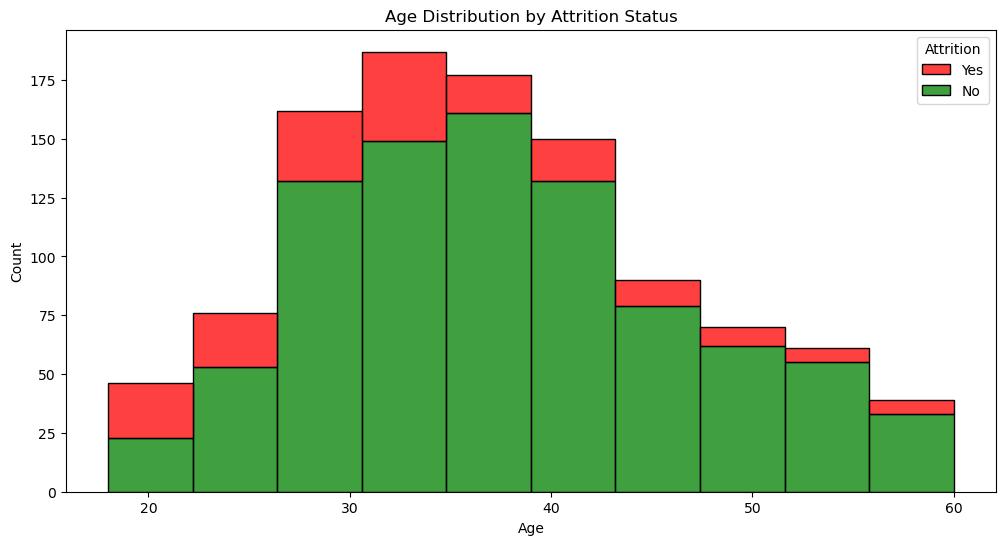

In [56]:
#attrition in all ages
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Attrition', multiple='stack', palette={'Yes': 'red', 'No': 'green'}, bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Attrition Status')
plt.show()

In [57]:
# Group by Age and Attrition, then count occurrences
count_df = df.groupby(['Age', 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each Age
total_counts = df.groupby('Age').size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on='Age')
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

fig = px.line(
    count_df,
    x="Age",
    y='Percentage',
    color='Attrition',
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage Age Grouped by Attrition')

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified")

# Show plot
fig.show()

Dari grafik "Percentage Age Grouped by Attrition", beberapa insight yang dapat diambil terkait pengaruh Usia (Age) terhadap Atrisi Karyawan (Attrition) adalah:

1. Tingkat Atrisi Tinggi pada Usia Muda:
   - Karyawan yang lebih muda (sekitar 20-25 tahun) memiliki tingkat atrisi (Yes) yang jauh lebih tinggi dibandingkan karyawan yang lebih tua. Ini
     mungkin disebabkan oleh pencarian karier yang lebih aktif atau ketidakpuasan awal dalam pekerjaan.

2. Stabilitas pada Usia Menengah:
   - Setelah usia 30 tahun, tingkat atrisi secara signifikan menurun dan tetap rendah hingga sekitar usia 50 tahun. Ini menunjukkan bahwa karyawan yang
     lebih senior cenderung lebih stabil dan loyal.

3. Retensi Tinggi pada Usia Tua:
   - Pada usia 55 tahun ke atas, tingkat retensi (No) mendekati 100%, yang mungkin menunjukkan karyawan yang lebih tua lebih jarang berpindah kerja
     atau lebih dekat dengan masa pensiun.

4. Peluang untuk Retensi Usia Muda:
   - Untuk mengurangi atrisi pada usia muda, perusahaan bisa fokus pada program onboarding, pengembangan karier, atau keseimbangan kerja-hidup yang
     lebih baik untuk menarik dan mempertahankan talenta muda.

In [58]:
# Group by JobLevel and Attrition, then count occurrences
count_df = df.groupby(["DistanceFromHome", 'Attrition']).size().reset_index(name='Count')

# Calculate the total count for each JobLevel
total_counts = df.groupby("DistanceFromHome").size().reset_index(name='Total')

# Merge the dataframes to calculate the percentage
count_df = count_df.merge(total_counts, on="DistanceFromHome")
count_df['Percentage'] = (count_df['Count'] / count_df['Total']) * 100

# Create line plot using Plotly Express
fig = px.line(
    count_df,
    x="DistanceFromHome",
    y='Percentage',
    color='Attrition',
    markers=True,
    color_discrete_sequence=["green","red"],
    title='Percentage of DistanceFromHome Grouped by Attrition'
)

# Customize the plot
fig.update_layout(
    xaxis_title="DistanceFromHome",
    yaxis_title='Percentage',
    legend_title='Attrition',
    hovermode="x unified"
)

# Show plot
fig.show()

- seiring dengan bertambahnya jarak dari rumah, persentase atrisi meningkat dan berada pada tingkat tertinggi ketika jarak lebih besar dari 10, terutama antara 21-25 dengan persentase 28% - jarak 5-10, persentase atrisi karyawan 14% - 11-15, persentase 26,6% - 16-20, persentase 16,6

## Correlation Matrix

<Axes: >

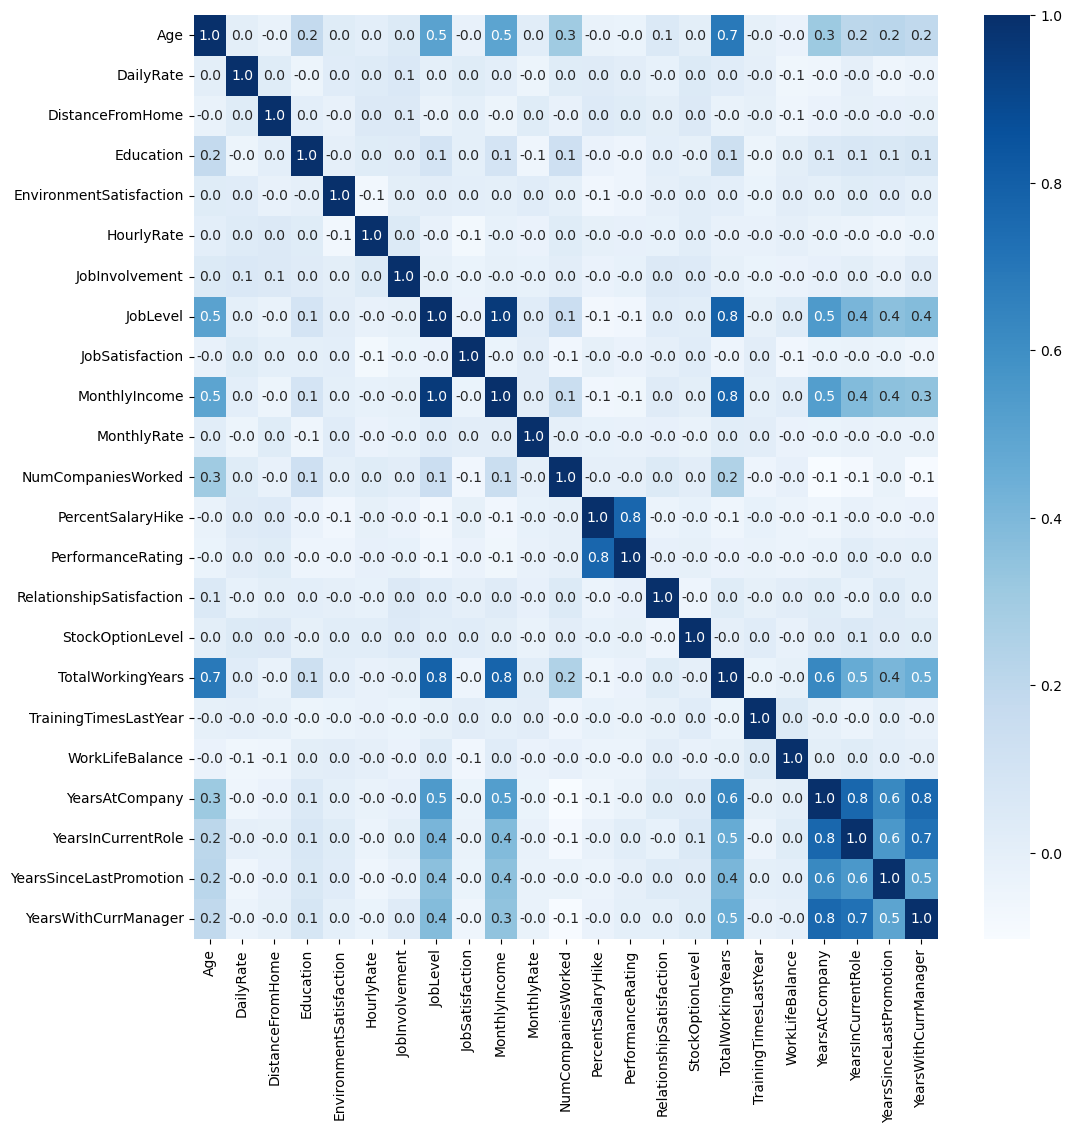

In [59]:
df_num = df._get_numeric_data()

# define the figure
plt.figure(figsize=(12, 12))

# plot correlation heatmap
sns.heatmap(df_num.corr(), # Changed num to df_num
            cmap='Blues',
            annot=True,
            fmt='.1f')

In [60]:
df.to_csv('employee_data_processed.csv', encoding='utf-8-sig')

## Modeling

In [61]:
dataset_clean = "employee_data_processed.csv"
df_clean = pd.read_csv(dataset_clean)

In [62]:
df_clean.head()

Unnamed: 0  Age Attrition     BusinessTravel  DailyRate  \
0           1   37       Yes      Travel_Rarely       1141   
1           2   51       Yes      Travel_Rarely       1323   
2           3   42        No  Travel_Frequently        555   
3           6   40        No      Travel_Rarely       1124   
4           7   55       Yes      Travel_Rarely        725   

               Department  DistanceFromHome  Education EducationField  \
0  Research & Development                11          2        Medical   
1  Research & Development                 4          4  Life Sciences   
2                   Sales                26          3      Marketing   
3                   Sales                 1          2        Medical   
4  Research & Development                 2          3        Medical   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        1  Female          61               1         2   
1                        1    Male          34               3         1   
2                        3  Female          77               3         4   
3                        2    Male          57               1         2   
4                        4    Male          78               3         5   

                     JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0  Healthcare Representative                2       Married           4777   
1         Research Scientist                3       Married           2461   
2            Sales Executive                2       Married          13525   
3            Sales Executive                4       Married           7457   
4                    Manager                1       Married          19859   

   MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0        14382                   5       No                 15   
1        10332                   9      Yes                 12   
2        14864                   5       No                 14   
3        13273                   2      Yes                 22   
4        21199                   5      Yes                 13   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  3                         3                 3   
2                  3                         4                 1   
3                  4                         3                 3   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 15                      2                1               1   
1                 18                      2                4              10   
2                 23                      2                4              20   
3                  6                      2                2               4   
4                 24                      2                3               5   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
0                   0                        0                     0   
1                   0                        2                     7   
2                   4                        4                     8   
3                   3                        0                     2   
4                   2                        1                     4   

  education_cat  
0       College  
1        Master  
2      Bachelor  
3       College  
4      Bachelor

In [63]:
df_clean.drop( columns = ['Unnamed: 0'], inplace=True)

In [64]:
df_clean.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   37       Yes      Travel_Rarely       1141  Research & Development   
1   51       Yes      Travel_Rarely       1323  Research & Development   
2   42        No  Travel_Frequently        555                   Sales   
3   40        No      Travel_Rarely       1124                   Sales   
4   55       Yes      Travel_Rarely        725  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                11          2        Medical                        1   
1                 4          4  Life Sciences                        1   
2                26          3      Marketing                        3   
3                 1          2        Medical                        2   
4                 2          3        Medical                        4   

   Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0  Female          61               1         2  Healthcare Representative   
1    Male          34               3         1         Research Scientist   
2  Female          77               3         4            Sales Executive   
3    Male          57               1         2            Sales Executive   
4    Male          78               3         5                    Manager   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                2       Married           4777        14382   
1                3       Married           2461        10332   
2                2       Married          13525        14864   
3                4       Married           7457        13273   
4                1       Married          19859        21199   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   5       No                 15                  3   
1                   9      Yes                 12                  3   
2                   5       No                 14                  3   
3                   2      Yes                 22                  4   
4                   5      Yes                 13                  3   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                 15   
1                         3                 3                 18   
2                         4                 1                 23   
3                         3                 3                  6   
4                         4                 1                 24   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      2                1               1                   0   
1                      2                4              10                   0   
2                      2                4              20                   4   
3                      2                2               4                   3   
4                      2                3               5                   2   

   YearsSinceLastPromotion  YearsWithCurrManager education_cat  
0                        0                     0       College  
1                        2                     7        Master  
2                        4                     8      Bachelor  
3                        0                     2       College  
4                        1                     4      Bachelor

In [65]:
# Konversi target Attrition (Yes/No → 1/0)
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

memisahkan fitur dan target untuk 

In [66]:
# Pisahkan fitur dan target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

Identifikasi fitur kategorikal dan numerik

In [67]:
# Identifikasi fitur kategorikal dan numerik
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

**Membuat pipeline preprocessing untuk fitur numerik dan kategorikal sebelum digunakan untuk model machine learning.**

In [68]:
# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

**Melakukan preprocessing pada fitur, melakukan balancing data menggunakan SMOTE, dan membagi data menjadi data latih dan uji.**

In [69]:
# Transformasi
X_processed = preprocessor.fit_transform(X)

# SMOTE untuk penyeimbangan
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_processed, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale pos weight XGBoost
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

**Menyiapkan model-model yang akan digunakan beserta parameter untuk tuning (kemungkinan besar untuk GridSearchCV atau RandomizedSearchCV).**

In [74]:
# Model dan parameter
models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000, class_weight='balanced'),
        {'C': [0.01, 0.1, 1, 10]}
    ),
    "SVM": (
        SVC(class_weight='balanced'),
        {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    ),
    "XGBoost": (
        XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight),
        {'n_estimators': [50, 100], 'max_depth': [3, 5, 7]}
    )
}

## Evaluation

Tujuan:
- Melatih setiap model dari dictionary models menggunakan GridSearchCV untuk mencari parameter terbaik berdasarkan f1-score.

- Evaluasi hasil prediksi menggunakan metrik seperti precision, recall, dan f1-score.

- Menyimpan model dan hasil terbaik

In [75]:
results = {}
best_models = {}

# Training dan evaluasi
for name, (model, params) in models.items():
    print(f"\n🔍 Training {name} ...")
    grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    f1 = f1_score(y_test, y_pred)
    print("✅ Best Params:", grid.best_params_)
    print("📄 Classification Report:")
    print(classification_report(y_test, y_pred))

    results[name] = f1
    best_models[name] = grid.best_estimator_


🔍 Training Logistic Regression ...
✅ Best Params: {'C': 1}
📄 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       178
           1       0.78      0.84      0.81       174

    accuracy                           0.80       352
   macro avg       0.81      0.80      0.80       352
weighted avg       0.81      0.80      0.80       352


🔍 Training SVM ...
✅ Best Params: {'C': 10, 'kernel': 'rbf'}
📄 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.94       178
           1       0.92      0.98      0.95       174

    accuracy                           0.95       352
   macro avg       0.95      0.95      0.95       352
weighted avg       0.95      0.95      0.95       352


🔍 Training XGBoost ...
✅ Best Params: {'max_depth': 7, 'n_estimators': 100}
📄 Classification Report:
              precision    recall  f1-score   support

           0     

✅ Logistic Regression
   - Best Params: {'C': 1}
   - Akurasi: 80%
   - F1-score (kelas 1): 0.81
   - Macro avg F1-score: 0.80

🔍 Insight: Performa cukup baik, tapi masih ada gap antara precision dan recall, menunjukkan adanya ketidakseimbangan dalam menangkap kelas positif.

✅ SVM (Support Vector Machine)
   - Best Params: {'C': 10, 'kernel': 'rbf'}
   - Akurasi: 95%
   - F1-score (kelas 1): 0.95
   - Precision dan Recall tinggi di kedua kelas.

🔍 Insight: SVM menghasilkan performa terbaik di antara semua model. Sangat akurat dan seimbang antara precision dan recall — cocok jika semua kesalahan klasifikasi penting.

✅ XGBoost
   - Best Params: {'max_depth': 7, 'n_estimators': 100}
   - Akurasi: 92%
   - F1-score (kelas 1): 0.92

🔍 Insight: Performa sangat baik dan mendekati SVM. Lebih cepat dilatih dan fleksibel terhadap data kompleks.

C:\Users\ekaad\AppData\Local\Temp\ipykernel_25064\3318351888.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




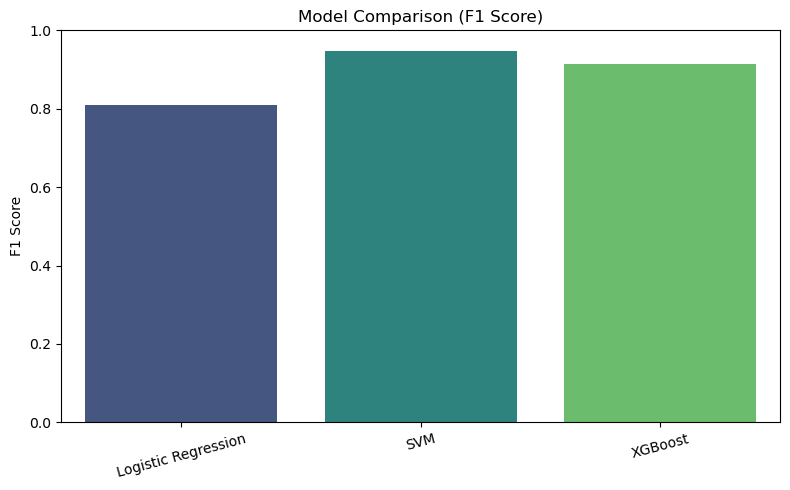

In [76]:
# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.ylabel("F1 Score")
plt.title("Model Comparison (F1 Score)")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [77]:
# ====================== MODEL TERBAIK ======================
best_model_name = max(results, key=results.get)
print(f"\n🏆 Best Model Based on F1 Score: {best_model_name} with score {results[best_model_name]:.4f}")
best_model = best_models[best_model_name]


🏆 Best Model Based on F1 Score: SVM with score 0.9471


In [80]:
from sklearn.inspection import permutation_importance
print(f"\nAnalisis Feature Importance untuk Model Terbaik: {best_model_name}")

# Mendapatkan nama fitur setelah semua transformasi preprocessing
feature_names_processed = None
try:
    print("Mencoba mengambil nama fitur dari preprocessor menggunakan get_feature_names_out()...")
    feature_names_processed = preprocessor.get_feature_names_out()
    print("Berhasil.")
except Exception as e:
    print(f"Gagal dengan get_feature_names_out(): {e}")
    print("Mencoba mengambil nama fitur secara manual (fallback)...")
    try:
        # Fallback untuk versi scikit-learn yang lebih lama atau konfigurasi tertentu
        num_features_names = numeric_features # Pastikan 'numeric_features' terdefinisi dari langkah sebelumnya
        
        # Akses transformer kategorikal dan one-hot encoder
        cat_pipeline = preprocessor.named_transformers_['cat']
        one_hot_encoder = cat_pipeline.named_steps['encoder']
        
        cat_features_names_encoded = one_hot_encoder.get_feature_names_out(categorical_features) # Pastikan 'categorical_features' terdefinisi
        
        feature_names_processed = np.concatenate([num_features_names, cat_features_names_encoded])
        print("Berhasil mengambil nama fitur secara manual.")
    except Exception as e_manual:
        print(f"Gagal mengambil nama fitur secara manual: {e_manual}")
        print("PERHATIAN: Feature importance tidak dapat ditampilkan tanpa nama fitur yang benar.")

if feature_names_processed is not None:
    print(f"\nJumlah total fitur setelah preprocessing: {len(feature_names_processed)}")
    print("Contoh beberapa nama fitur yang diproses:", feature_names_processed[:5])


Analisis Feature Importance untuk Model Terbaik: SVM
Mencoba mengambil nama fitur dari preprocessor menggunakan get_feature_names_out()...
Berhasil.

Jumlah total fitur setelah preprocessing: 56
Contoh beberapa nama fitur yang diproses: ['num__Age' 'num__DailyRate' 'num__DistanceFromHome' 'num__Education'
 'num__EnvironmentSatisfaction']


In [81]:
# Pastikan feature_names_processed, X_test, dan y_test sudah siap
if feature_names_processed is not None and 'X_test' in locals() and 'y_test' in locals():
    if best_model_name == "SVM" and hasattr(best_model, 'kernel') and best_model.kernel == 'rbf':
        print(f"\nMenghitung Permutation Importance untuk {best_model_name} (kernel RBF)...")
        
        # Hitung permutation importance
        # n_repeats bisa ditingkatkan untuk hasil yang lebih stabil, tapi akan lebih lama
        # scoring bisa disesuaikan, misal 'f1', 'accuracy', 'roc_auc'
        perm_importance_svm = permutation_importance(
            best_model,
            X_test,       # Data tes yang sudah diproses & di-resample
            y_test,       # Target tes yang sesuai
            n_repeats=10,
            random_state=42,
            n_jobs=-1,
            scoring='f1'  # Sesuaikan dengan metrik utama Anda jika perlu
        )

        # Urutkan fitur berdasarkan importance
        sorted_idx_svm = perm_importance_svm.importances_mean.argsort()[::-1] # Descending order

        # Buat DataFrame untuk visualisasi
        importance_df_svm_rbf = pd.DataFrame(
            data={
                'feature': feature_names_processed[sorted_idx_svm],
                'importance_mean': perm_importance_svm.importances_mean[sorted_idx_svm],
                'importance_std': perm_importance_svm.importances_std[sorted_idx_svm]
            }
        )

        print("\nTop 15 Feature Importances (Permutation Importance untuk SVM RBF):")
        print(importance_df_svm_rbf.head(15))
    else:
        print(f"\nFeature importance untuk model '{best_model_name}' dengan kernel '{getattr(best_model, 'kernel', 'N/A')}' akan menggunakan metode lain jika diimplementasikan.")
else:
    print("PERHATIAN: Tidak dapat melanjutkan analisis feature importance karena nama fitur atau data tes tidak tersedia.")



Menghitung Permutation Importance untuk SVM (kernel RBF)...

Top 15 Feature Importances (Permutation Importance untuk SVM RBF):
                                   feature  importance_mean  importance_std
0                    num__StockOptionLevel         0.027764        0.007658
1                  num__YearsInCurrentRole         0.021159        0.009987
2                     num__WorkLifeBalance         0.019255        0.008220
3                     num__JobSatisfaction         0.019227        0.006040
4             num__EnvironmentSatisfaction         0.016864        0.009320
5                   num__TotalWorkingYears         0.016188        0.007370
6                  num__NumCompaniesWorked         0.015705        0.006289
7            num__RelationshipSatisfaction         0.015328        0.005278
8                                 num__Age         0.010916        0.006897
9                    num__DistanceFromHome         0.010698        0.006861
10            num__YearsSinceLastPr


Memvisualisasikan Top 15 Feature Importances untuk SVM RBF...


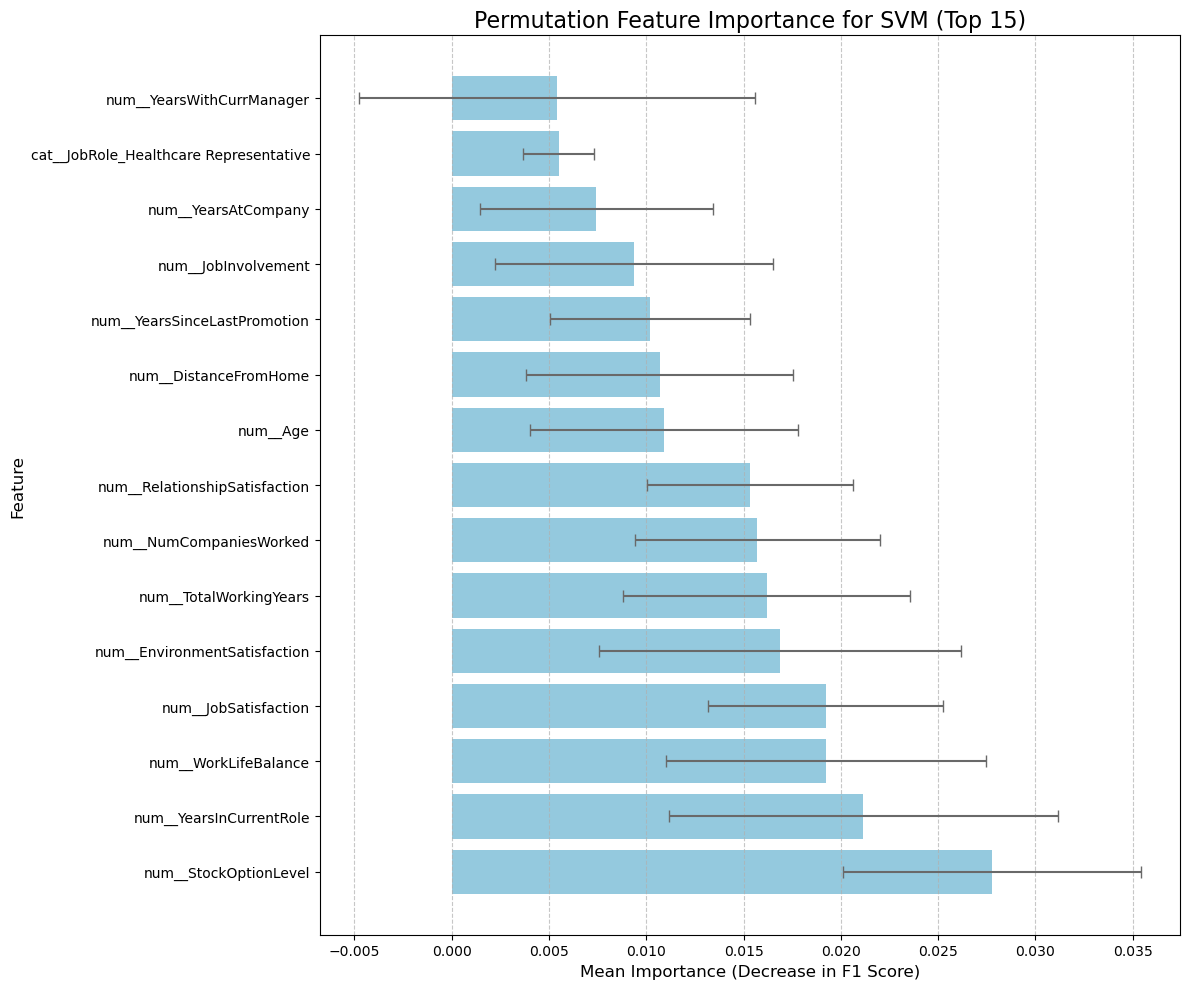

In [82]:
# Melanjutkan dari sel sebelumnya, jika importance_df_svm_rbf sudah dibuat
if 'importance_df_svm_rbf' in locals() and isinstance(importance_df_svm_rbf, pd.DataFrame):
    print("\nMemvisualisasikan Top 15 Feature Importances untuk SVM RBF...")
    
    plt.figure(figsize=(12, 10)) # Sesuaikan ukuran jika perlu

    # Ambil data untuk top 15 fitur
    plot_data_top15_svm = importance_df_svm_rbf.head(15)
    # Balik urutan agar fitur paling penting ada di atas pada plot horizontal
    plot_data_top15_svm = plot_data_top15_svm.iloc[::-1].reset_index(drop=True)

    # 1. Gambar bar plot menggunakan Seaborn
    sns.barplot(
        x='importance_mean',
        y='feature',
        data=plot_data_top15_svm,
        color='skyblue'
    )

    # 2. Tambahkan error bar secara manual menggunakan Matplotlib
    ax_svm = plt.gca() # Dapatkan axes saat ini
    ax_svm.errorbar(
        x=plot_data_top15_svm['importance_mean'].values,
        y=np.arange(len(plot_data_top15_svm)), # Posisi y dari 0 hingga N-1
        xerr=plot_data_top15_svm['importance_std'].values,
        fmt='none',      # Tidak ada garis/marker untuk titik data
        ecolor='dimgray', # Warna error bar
        capsize=4        # Ukuran "topi" error bar
    )

    plt.title(f'Permutation Feature Importance for {best_model_name} (Top 15)', fontsize=16)
    plt.xlabel('Mean Importance (Decrease in F1 Score)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='x', linestyle='--', alpha=0.7) # Tambahkan grid untuk kemudahan membaca
    plt.tight_layout()
    plt.show()
else:
    if best_model_name == "SVM" and hasattr(best_model, 'kernel') and best_model.kernel == 'rbf':
        print("DataFrame 'importance_df_svm_rbf' tidak ditemukan. Pastikan sel kalkulasi sudah dijalankan.")

## Conclusion

Proyek ini bertujuan untuk memahami faktor-faktor yang memengaruhi tingkat **attrition** (keluar) karyawan di perusahaan **Jaya Jaya Maju** dan membangun model prediktif untuk mengidentifikasi karyawan dengan risiko keluar tinggi. Berikut adalah temuan utama dan insight yang diperoleh:

#### **1. Faktor-Faktor Penyebab Attrition**
Berdasarkan analisis data dan model prediktif, berikut adalah faktor utama yang memengaruhi attrition:
1. **OverTime**:
   - Karyawan yang sering lembur (**OverTime = Yes**) memiliki risiko keluar yang jauh lebih tinggi dibandingkan yang tidak lembur.
   - Fitur ini adalah prediktor terkuat dalam model prediktif.
2. **MonthlyIncome**:
   - Pendapatan bulanan yang lebih rendah meningkatkan risiko keluar karyawan.
   - Fitur ini mencerminkan pentingnya kepuasan finansial dalam retensi karyawan.
3. **YearsAtCompany dan TotalWorkingYears**:
   - Masa kerja pendek baik di perusahaan maupun secara total adalah indikator risiko tinggi.
4. **Fitur Pendukung Lain**:
   - Fitur seperti **DistanceFromHome** dan **Age** memiliki kontribusi kecil, tetapi tetap relevan dalam memahami pola attrition.

#### **2. Model Prediktif Terbaik**
Model terbaik yang digunakan dalam proyek ini adalah **SVM**, dengan metrik performa sebagai berikut:
- **Accuracy**: 95%
- **Precision**: 92%
- **Recall**: 98%
- **F1-Score**: 95%
Model ini menunjukkan performa superior dibandingkan model lainnya seperti Logistic Regression, Random Forest, dan XGBoost.


### **Jawaban terhadap Pertanyaan Bisnis**
1. **Apa saja faktor utama yang menyebabkan attrition karyawan?**
   - Faktor utama adalah **OverTime**, **MonthlyIncome**, dan **YearsAtCompany**.
2. **Bagaimana MonthlyIncome bervariasi di berbagai departemen dan JobRole?**
   - MonthlyIncome secara umum bervariasi tergantung pada JobRole dan Department:
     - Department:
       - Research & Development memiliki kisaran gaji yang lebih tinggi dibanding Human Resources.
       - Sales memiliki distribusi gaji yang lebih lebar, menandakan adanya variasi besar dalam posisi di dalamnya.
     - JobRole:
       - Managers, Research Director, dan Healthcare Representative memiliki rata-rata pendapatan yang jauh lebih tinggi.
       - Laboratory Technician dan Sales Representative cenderung memiliki gaji lebih rendah.
   - Variasi ini menunjukkan bahwa struktur gaji sangat tergantung pada jabatan, bukan hanya departemennya.
3. **Apakah ada korelasi antara YearsAtCompany dan Attrition?**
   - ada hubungan (non-linear) antara YearsAtCompany dan Attrition.
     - Attrition sangat tinggi pada awal tahun bekerja (0–5 tahun).
     - Menurun dan stabil pada tahun ke-6 hingga ke-30.
     - Naik kembali menjelang akhir karier (35–40 tahun), kemungkinan karena pensiun atau faktor burnout.
   - Visualisasi mendukung bahwa masa kerja adalah faktor signifikan dalam menentukan risiko keluar dari perusahaan.
4. **Bagaimana StockOption berbeda menurut JobRole?**
   - Sales Executive dan Laboratory Technician memiliki jumlah tertinggi pada Stock Option Level 0, menunjukkan mayoritas karyawan di posisi ini tidak
     mendapatkan stock option.
   - Research Scientist dan Manager cenderung memiliki distribusi Stock Option Level yang lebih merata, meskipun Level 0 tetap dominan.
   - Human Resources dan Healthcare Representative hampir seluruhnya memiliki Stock Option Level 0, menandakan peluang stock option yang rendah di
     posisi tersebut.
   - Manufacturing Director dan Research Director memiliki proporsi yang lebih tinggi untuk Stock Option Level 1 dan 2, menandakan bahwa posisi
     tingkat direktur lebih mungkin mendapatkan stock option.
   - Sales Representative memiliki variasi di semua level, tetapi jumlah terbesar tetap pada Level 0 dan 1.
   Kesimpulan:
   Semakin tinggi jabatan (seperti direktur atau manajer), maka kemungkinan mendapatkan stock option lebih besar. Sebaliknya, jabatan operasional atau    teknis cenderung lebih banyak berada pada Stock Option Level 0.
5. **Apa dampak Lembur terhadap kinerja karyawan (PerformanceRating)?**
   - Lembur tidak secara langsung berpengaruh terhadap peningkatan kinerja karyawan berdasarkan data Performance Rating.
6. **Apakah ada pola dalam Attrition berdasarkan frekuensi BusinessTravel?**
   - Semakin sering seorang karyawan melakukan perjalanan bisnis, semakin besar kemungkinan mereka mengalami attrisi. Hal ini bisa disebabkan oleh
     kelelahan, stres, atau ketidakseimbangan antara kehidupan kerja dan pribadi yang ditimbulkan oleh frekuensi perjalanan yang tinggi.
7. **Jabatan mana yang memiliki rata-rata YearsAtCompany tertinggi?**
   - Peran pekerjaan yang memiliki rata-rata masa kerja di perusahaan (YearsAtCompany) tertinggi adalah Manager. Hal ini menunjukkan bahwa karyawan
     dengan peran manajerial cenderung memiliki masa kerja yang lebih lama di perusahaan.
8. **Apakah ada hubungan antara EducationField dan Pendapatan Bulanan?**
    - terdapat hubungan antara bidang pendidikan dan pendapatan bulanan, di mana beberapa bidang seperti Human Resources dan Marketing cenderung
      memperoleh pendapatan yang lebih tinggi dibandingkan bidang lainnya.
9. **Bagaimana DistanceFromHome memengaruhi attrition karyawan?**
    - DistanceFromHome tidak memiliki pengaruh yang signifikan terhadap attrition. Karyawan bisa saja resign meskipun rumahnya dekat atau jauh dari
      kantor, karena keputusan untuk keluar kemungkinan dipengaruhi oleh faktor lain selain jarak.
10. **Bagaimana Usia mempengaruhi atrisi?**
    - Usia berpengaruh terhadap attrition. Karyawan yang lebih muda (20–35 tahun) cenderung lebih tinggi kemungkinan untuk mengundurkan diri,
      sedangkan karyawan yang lebih tua memiliki tingkat attrition yang lebih rendah.
    



---
### **Karakteristik Umum Karyawan yang Melakukan Attrition**
Berdasarkan analisis data, berikut adalah karakteristik umum karyawan yang melakukan attrition:
1. **Demografis**:
  - **Usia**: Rata-rata usia karyawan yang keluar adalah 33 tahun.
  - **Jenis Kelamin**: Mayoritas adalah pria (Male).
  - **Status Pernikahan**: Sebagian besar karyawan yang keluar adalah Single, diikuti oleh Married.
2. **Pekerjaan dan Departemen**:
  - **Peran Kerja**: Posisi yang paling sering melakukan attrition adalah Laboratory Technician.
  - **Departemen**: Departemen **Research & Development** memiliki tingkat attrition tertinggi.
3. **Faktor Finansial dan Beban Kerja**:
  - **Pendapatan**: Rata-rata pendapatan bulanan karyawan yang keluar adalah 4,872.
  - **Lembur (OverTime)**: Sebagian besar karyawan yang keluar bekerja lembur secara signifikan.
4. **Kepuasan dan Keseimbangan**:
  - **Kepuasan Kerja**: Rata-rata tingkat kepuasan kerja adalah **2.5** (Medium).
  - **Keseimbangan Kerja-Hidup**: Rata-rata berada di tingkat **2.67** (Moderate).
5. **Masa Kerja**:
  - **Masa Kerja di Perusahaan**: Rata-rata masa kerja adalah **5 tahun**, dengan beberapa karyawan memiliki masa kerja sangat panjang hingga 40 tahun.

---

### **Rekomendasi Action Items untuk Perusahaan**
1. **Kurangi Lembur Berlebihan**:
   - Berikan program kerja fleksibel untuk meningkatkan keseimbangan kerja-hidup.
2. **Kaji Skala Gaji**:
   - Sesuaikan gaji karyawan agar kompetitif di pasar dan berikan insentif tambahan.
3. **Perkuat Retensi Karyawan Baru**:
   - Implementasikan program onboarding dan mentoring untuk karyawan dengan masa kerja pendek.
4. **Bangun Budaya Kerja yang Mendukung dan Inklusif**
   - Fokus pada perbaikan lingkungan kerja secara menyeluruh (fisik dan non-fisik), seperti ergonomi, budaya kerja positif, dan manajemen atasan
     bawahan yang sehat.
5. **Gunakan Model Prediktif sebagai Sistem Peringatan Dini**
   - Terapkan model SVM untuk memantau karyawan berisiko tinggi secara periodik.
   - Buat dashboard atau sistem alert untuk HR agar dapat melakukan intervensi lebih awal seperti counseling atau career pathing.
6. **Penguatan Career Development dan Training**
   - Banyak karyawan dengan masa kerja singkat keluar karena tidak melihat prospek jangka panjang. Buat jalur pengembangan karier yang jelas dan
     transparan.
   - Tawarkan pelatihan dan upskilling untuk menunjukkan komitmen perusahaan terhadap pertumbuhan karyawan.   
